In [2]:
import warnings;
warnings.filterwarnings('ignore');

In [3]:
from my_utils import loader
import arviz as az
from theano import tensor as T
from my_utils import modeler, loader
import importlib
importlib.reload(modeler)
importlib.reload(loader)
from sklearn.metrics import accuracy_score

# __Free viewing__

### __General empathy__

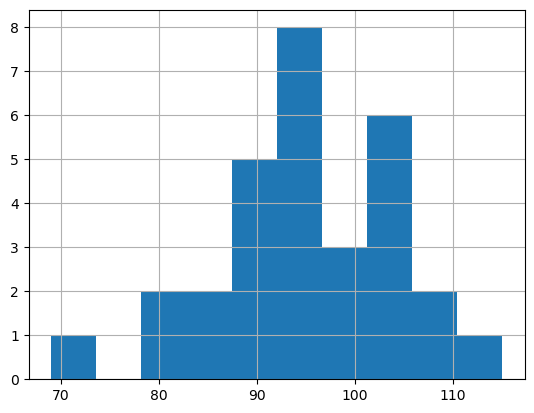

In [13]:
free_viewing_empathy = loader.load_eyeT_empathy_levels(experiment= "free")
free_viewing_empathy.hist();
free_viewing_empathy_median = free_viewing_empathy.median()

#### __Fixations__

In [14]:
free_fix_features_train, free_fix_labels_train, free_sac_features_train, free_sac_labels_train =  loader.get_eyeT_features_and_labels("train", "free")
free_fix_labels_train_class = modeler.make_labels_binary(free_fix_labels_train, free_viewing_empathy_median)
free_fix_empathy, free_fix_empathy_trace = modeler.generate_logistic_regression_model("free_fix_logistic_regression", free_fix_features_train, free_fix_labels_train_class)

##### Sampling diagnostics

In [15]:
az.summary(free_fix_empathy_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]    0.138  3.039  -5.781    5.600      0.062    0.052    2392.0   
beta[1]    1.970  0.231   1.556    2.416      0.005    0.003    2254.0   
beta[2]   13.405  3.055   7.771   19.355      0.064    0.045    2292.0   
beta[3]   -2.039  2.386  -6.536    2.432      0.048    0.037    2484.0   
beta[4]    0.347  0.491  -0.587    1.223      0.009    0.008    3223.0   
beta[5]  -10.898  2.081 -14.908   -6.976      0.042    0.030    2411.0   
beta[6]   -3.345  0.887  -4.890   -1.571      0.019    0.014    2110.0   
beta[7]    0.328  0.119   0.095    0.547      0.002    0.002    3323.0   
beta[8]   -2.362  0.721  -3.703   -0.987      0.018    0.013    1624.0   
beta[9]    4.495  1.009   2.695    6.486      0.025    0.018    1649.0   
beta[10]  -1.182  0.367  -1.879   -0.498      0.008    0.005    2372.0   
beta[11]   0.790  0.709  -0.565    2.111      0.018    0.013    1577.0   
beta[12]   4.635  0.606   3.528    5.817      0.012    0.009    2463.0   
beta[13]   0.318  0.331  -0.316    0.905      0.007    0.005    2426.0   
beta[14]  -3.392  0.383  -4.096   -2.660      0.008    0.006    2405.0   

          ess_tail  r_hat  
beta[0]     2279.0    1.0  
beta[1]     2483.0    1.0  
beta[2]     2042.0    1.0  
beta[3]     2377.0    1.0  
beta[4]     2496.0    1.0  
beta[5]     2257.0    1.0  
beta[6]     2182.0    1.0  
beta[7]     2402.0    1.0  
beta[8]     1965.0    1.0  
beta[9]     2122.0    1.0  
beta[10]    2543.0    1.0  
beta[11]    1964.0    1.0  
beta[12]    2245.0    1.0  
beta[13]    2448.0    1.0  
beta[14]    2395.0    1.0

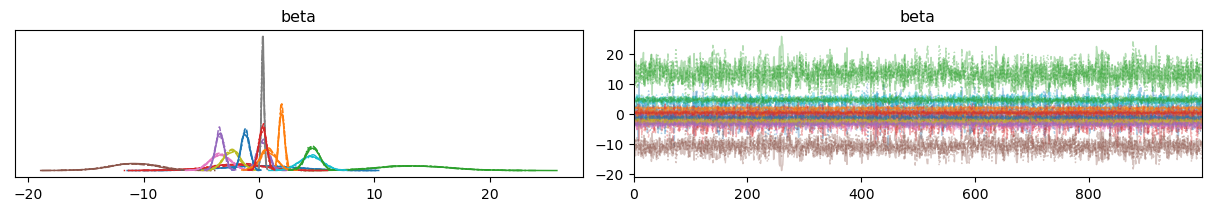

In [16]:
az.plot_trace(free_fix_empathy_trace);

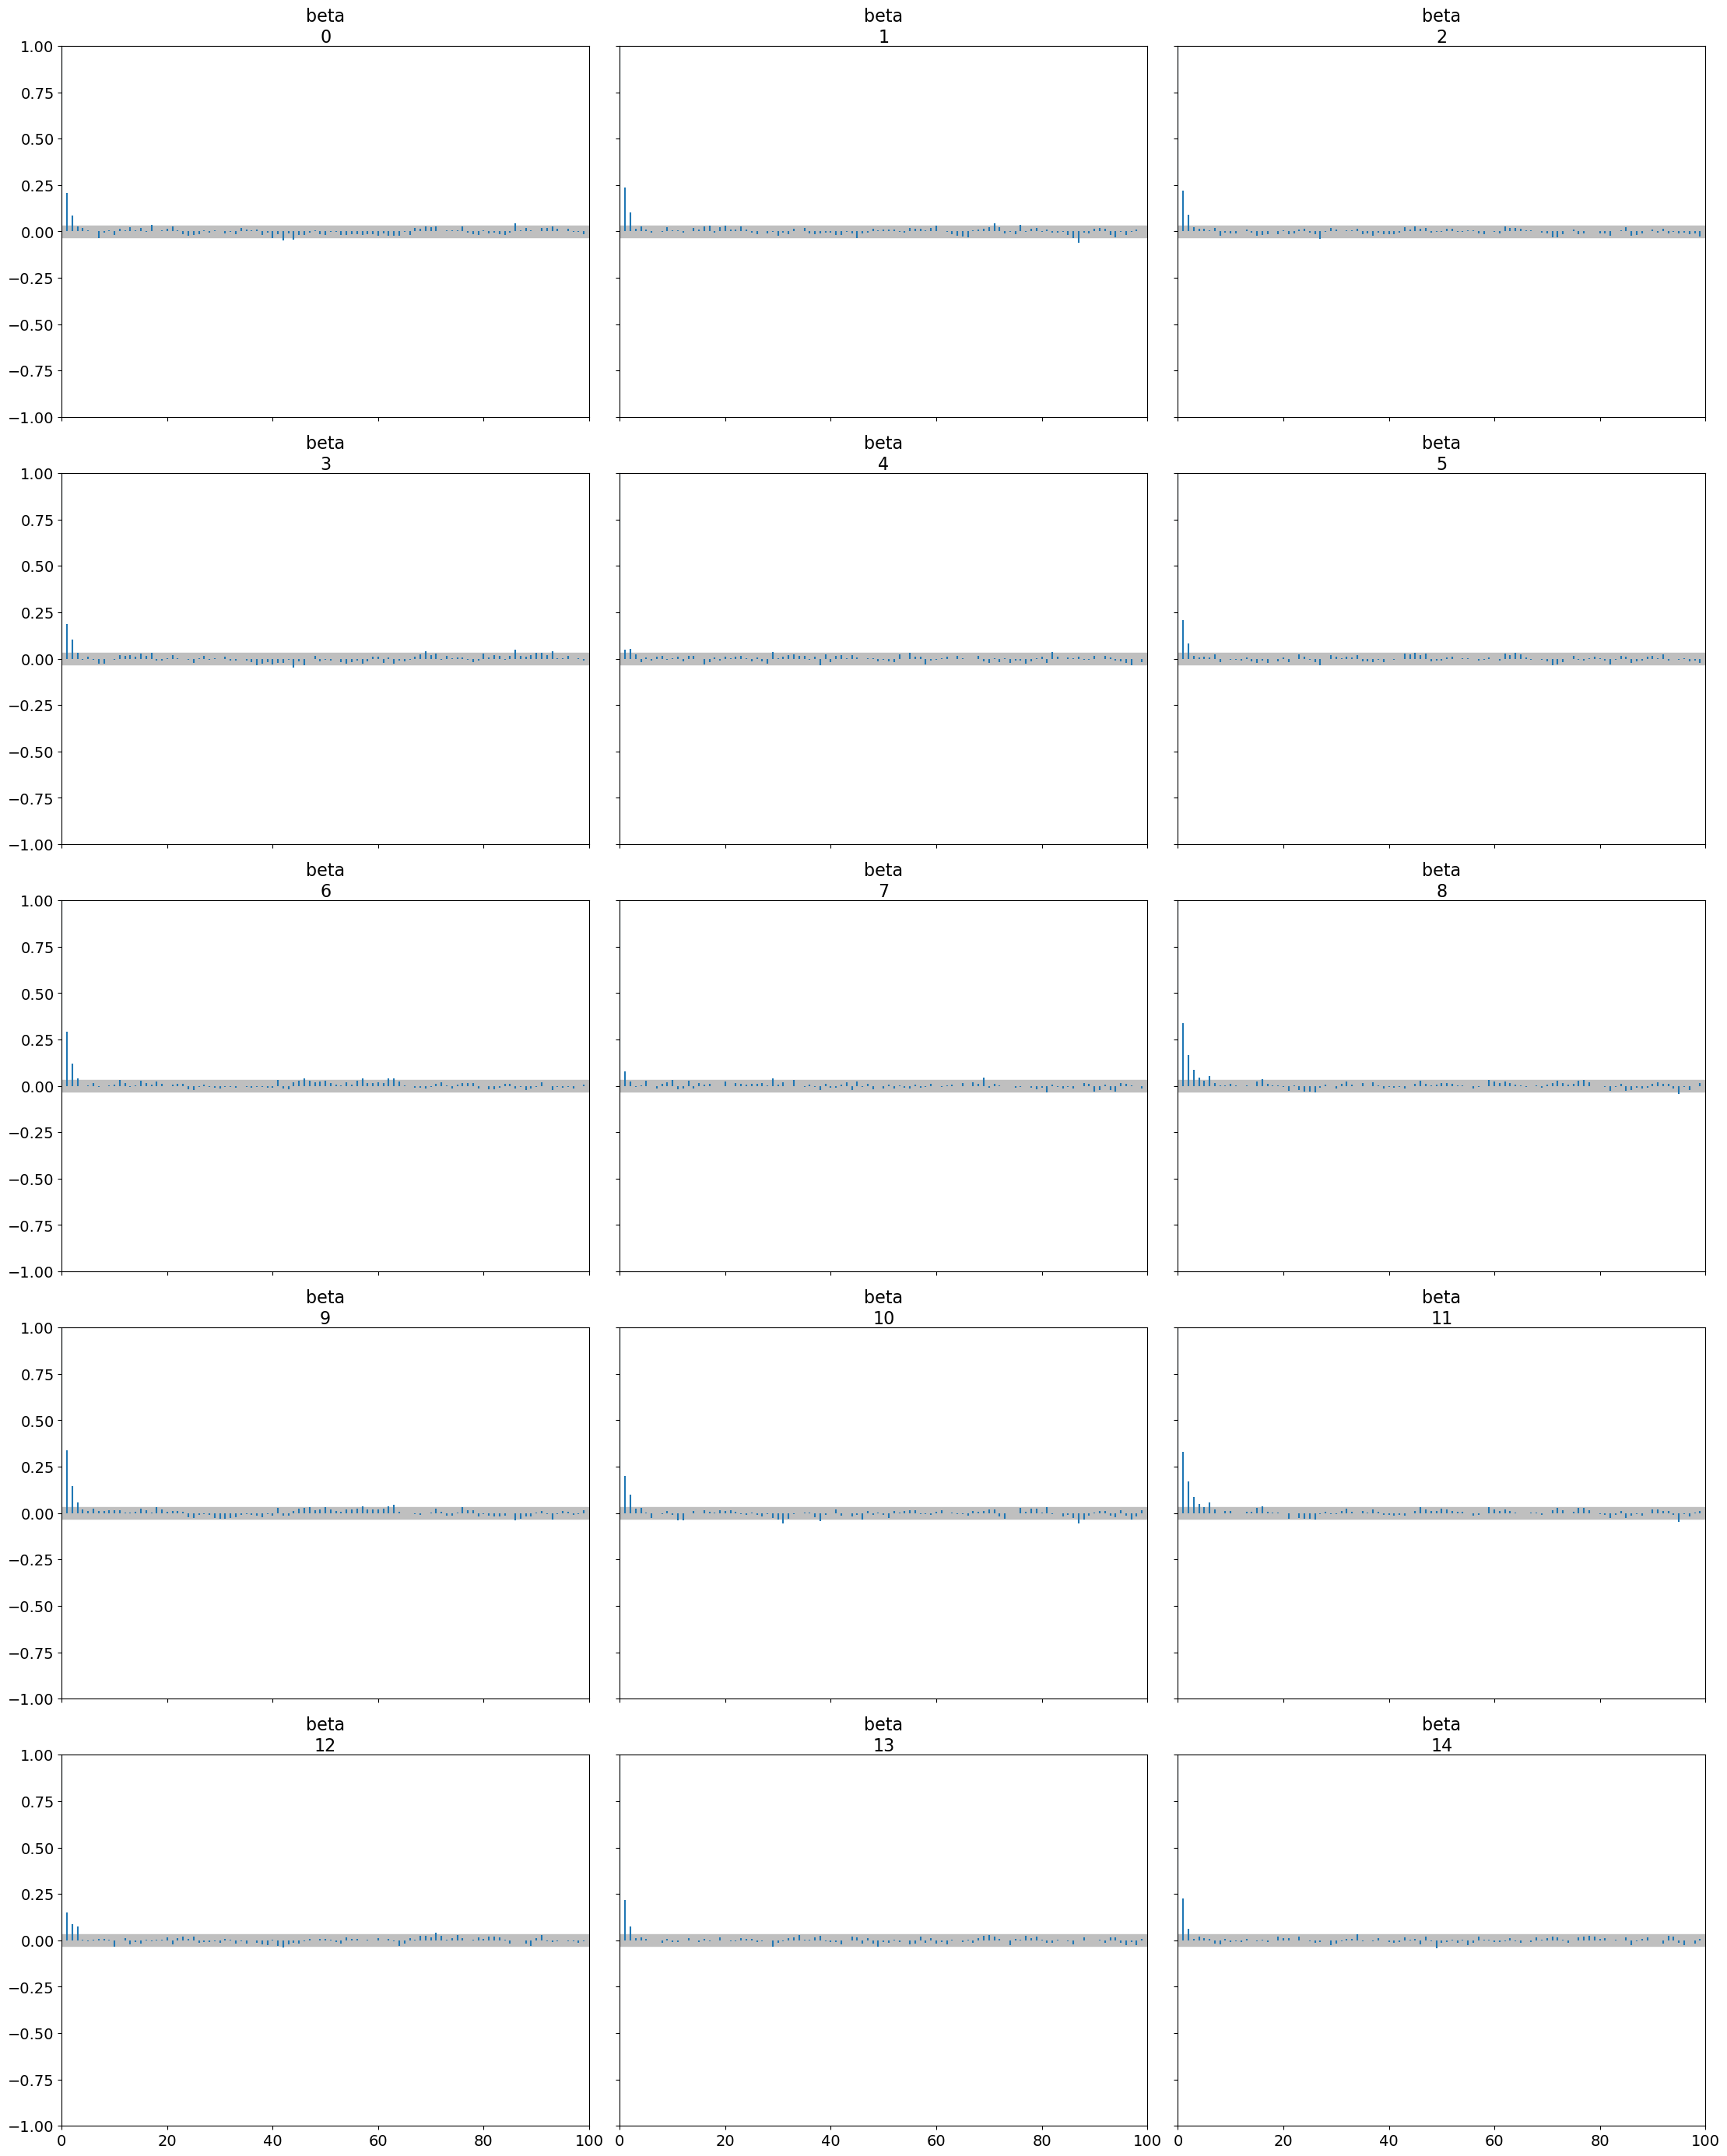

In [18]:
az.plot_autocorr(free_fix_empathy_trace, combined=True);

##### Predictions

In [ ]:
free_fix_features_test, free_fix_labels_test, free_sac_features_test, free_sac_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free")
free_fix_labels_test_class = modeler.make_labels_binary(free_fix_labels_test, free_viewing_empathy_median)
free_fix_predictions = modeler.generate_model_predictions(free_fix_empathy, free_fix_features_test, free_fix_empathy_trace)
free_fix_predictions_class = modeler.make_labels_binary(free_fix_predictions, 0.5)
accuracy_score(free_fix_labels_test_class, free_fix_predictions_class)

0.639643060565787

#### __Saccades__

In [ ]:
free_sac_labels_train_class = modeler.make_labels_binary(free_sac_labels_train, free_viewing_empathy_median)
free_sac_empathy, free_sac_empathy_trace = modeler.generate_logistic_regression_model("free_sac_logistic_regression", free_sac_features_train, free_sac_labels_train_class)

Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 280 seconds.


Saving model...


##### Sampling diagnostics

In [ ]:
az.summary(free_sac_empathy_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   2.282  0.678   0.915    3.476      0.012    0.008    3269.0   
beta[1]   1.086  0.191   0.723    1.434      0.003    0.002    3514.0   
beta[2]   0.649  1.393  -2.035    3.182      0.027    0.021    2708.0   
beta[3]  -3.032  1.153  -5.159   -0.861      0.020    0.014    3394.0   
beta[4]   1.203  1.051  -0.668    3.221      0.018    0.014    3537.0   
beta[5]  -0.563  1.039  -2.548    1.312      0.019    0.015    2884.0   
beta[6]  -0.504  0.512  -1.470    0.432      0.011    0.008    2308.0   
beta[7]   0.083  0.090  -0.087    0.243      0.001    0.001    4662.0   
beta[8]   0.801  0.457  -0.051    1.636      0.009    0.007    2495.0   
beta[9]   0.371  0.678  -0.892    1.634      0.015    0.011    2073.0   
beta[10]  0.291  0.354  -0.359    0.973      0.007    0.005    2393.0   
beta[11] -1.440  0.480  -2.342   -0.534      0.009    0.007    2572.0   
beta[12]  0.348  0.093   0.177    0.522      0.001    0.001    4237.0   
beta[13] -2.455  0.323  -3.045   -1.823      0.006    0.004    3049.0   
beta[14]  1.605  0.318   1.017    2.197      0.005    0.004    3943.0   
beta[15]  0.565  0.414  -0.156    1.359      0.008    0.006    2788.0   
beta[16] -2.877  0.447  -3.690   -2.023      0.009    0.006    2624.0   

          ess_tail  r_hat  
beta[0]     3133.0    1.0  
beta[1]     3452.0    1.0  
beta[2]     2470.0    1.0  
beta[3]     3017.0    1.0  
beta[4]     3217.0    1.0  
beta[5]     2891.0    1.0  
beta[6]     2617.0    1.0  
beta[7]     2880.0    1.0  
beta[8]     2484.0    1.0  
beta[9]     2102.0    1.0  
beta[10]    2686.0    1.0  
beta[11]    2412.0    1.0  
beta[12]    3129.0    1.0  
beta[13]    2674.0    1.0  
beta[14]    2855.0    1.0  
beta[15]    2683.0    1.0  
beta[16]    2520.0    1.0

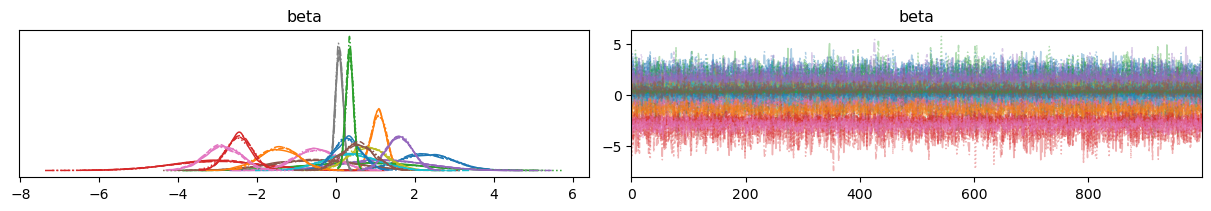

In [ ]:
az.plot_trace(free_sac_empathy_trace);

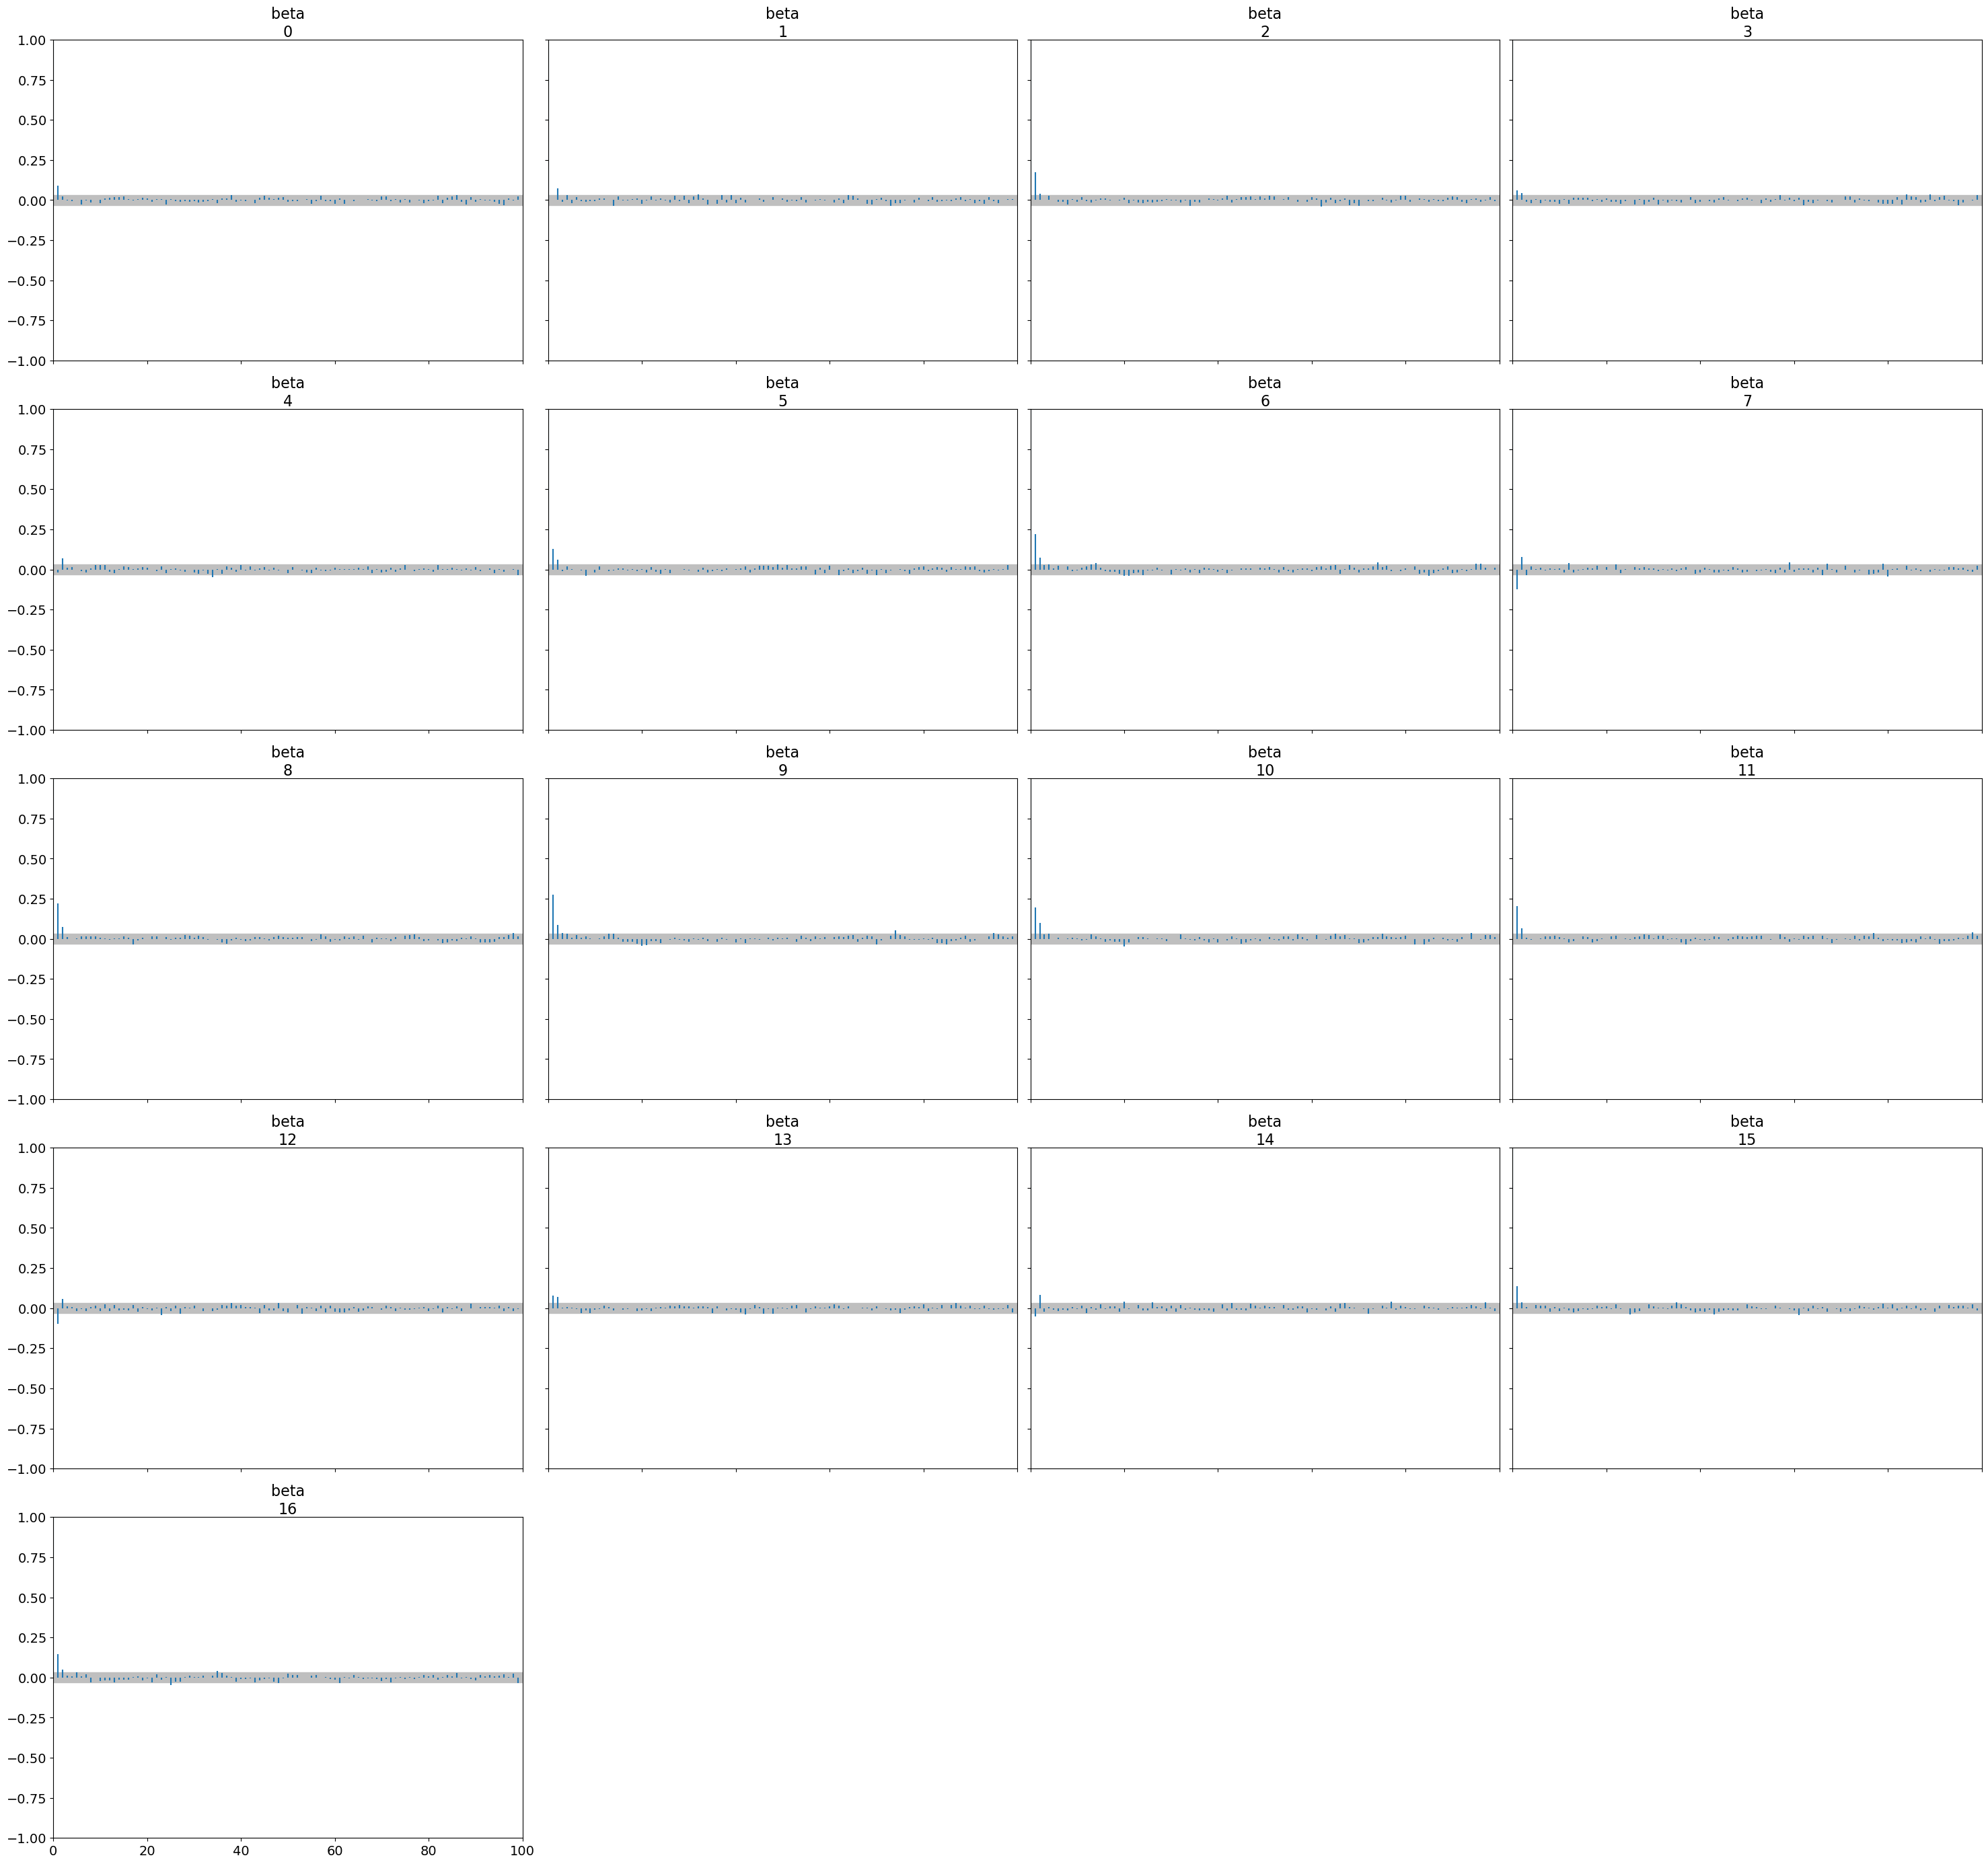

In [ ]:
az.plot_autocorr(free_sac_empathy_trace, combined=True);

##### Predictions

In [ ]:
free_sac_labels_test_class = modeler.make_labels_binary(free_sac_labels_test, free_viewing_empathy_median)
free_sac_predictions = modeler.generate_model_predictions(free_sac_empathy, free_sac_features_test, free_sac_empathy_trace)
free_sac_predictions_class = modeler.make_labels_binary(free_sac_predictions, 0.5)
accuracy_score(free_sac_labels_test_class, free_sac_predictions_class)

0.6514200298953662

#### __Combined prediction__

In [ ]:
free_fix_stimuli, free_sac_stimuli = loader.get_stimuli("test", "free")

In [ ]:
predicted_empathy = modeler.combine_predictions(free_fix_predictions, free_fix_stimuli, free_sac_predictions, free_sac_stimuli)
real_empathy_values = [1 if free_viewing_empathy[k[1]] >= 95 else 0 for k in predicted_empathy.keys()]
predicted_empathy_values = [1 if level >= 0.5 else 0 for level in list(predicted_empathy.values())]
accuracy_score(predicted_empathy_values, real_empathy_values)

0.7

### __Cognitive empathy__

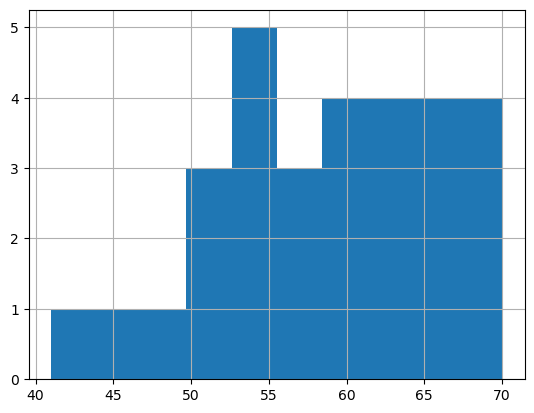

In [ ]:
free_viewing_cognitive_empathy = loader.load_eyeT_empathy_levels(experiment= "free", type="cognitive")
free_viewing_cognitive_empathy.hist();
free_viewing_cognitive_empathy_median = free_viewing_cognitive_empathy.median()

#### __Fixations__

In [ ]:
free_fix_cog_features_train, free_fix_cog_labels_train, free_sac_cog_features_train, free_sac_cog_labels_train =  loader.get_eyeT_features_and_labels(dset="train", type="cognitive", experiment="free")
free_fix_cog_labels_train_class = modeler.make_labels_binary(free_fix_cog_labels_train, free_viewing_cognitive_empathy_median)
free_fix_cog_empathy, free_fix_cog_trace = modeler.generate_logistic_regression_model("free_fix_cognitive_logistic_regression", free_fix_cog_features_train, free_fix_cog_labels_train_class)

Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 541 seconds.


Saving model...


##### Sampling diagnostics

In [ ]:
az.summary(free_fix_cog_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]    8.666  4.404   0.809   16.914      0.076    0.062    3492.0   
beta[1]   -3.057  0.251  -3.525   -2.585      0.005    0.003    2830.0   
beta[2]   14.782  3.221   8.846   20.891      0.059    0.042    2944.0   
beta[3]   -8.275  4.184 -16.412   -0.999      0.075    0.059    3275.0   
beta[4]   -1.179  0.516  -2.173   -0.230      0.008    0.006    4304.0   
beta[5]  -10.886  2.189 -15.438   -7.249      0.040    0.028    3028.0   
beta[6]   -1.712  0.965  -3.629    0.016      0.018    0.013    2919.0   
beta[7]   -0.241  0.137  -0.488    0.023      0.002    0.001    4917.0   
beta[8]   -4.623  0.831  -6.159   -3.055      0.017    0.012    2476.0   
beta[9]    1.231  1.082  -0.826    3.252      0.021    0.016    2650.0   
beta[10]   1.209  0.409   0.429    1.953      0.007    0.005    3093.0   
beta[11]   1.533  0.805   0.061    3.072      0.016    0.011    2506.0   
beta[12]   6.558  0.624   5.295    7.645      0.010    0.007    4002.0   
beta[13]   0.201  0.341  -0.435    0.849      0.005    0.005    3871.0   
beta[14]   2.626  0.395   1.855    3.332      0.006    0.005    3863.0   

          ess_tail  r_hat  
beta[0]     2390.0    1.0  
beta[1]     3295.0    1.0  
beta[2]     2535.0    1.0  
beta[3]     2478.0    1.0  
beta[4]     2699.0    1.0  
beta[5]     2626.0    1.0  
beta[6]     2890.0    1.0  
beta[7]     3118.0    1.0  
beta[8]     2514.0    1.0  
beta[9]     2701.0    1.0  
beta[10]    2271.0    1.0  
beta[11]    2575.0    1.0  
beta[12]    2655.0    1.0  
beta[13]    2867.0    1.0  
beta[14]    2964.0    1.0

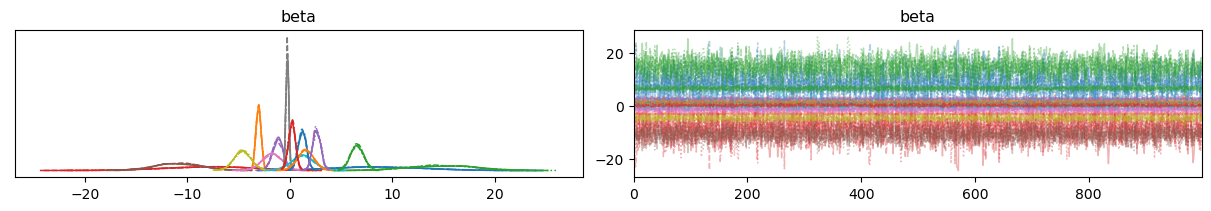

In [ ]:
az.plot_trace(free_fix_cog_trace);

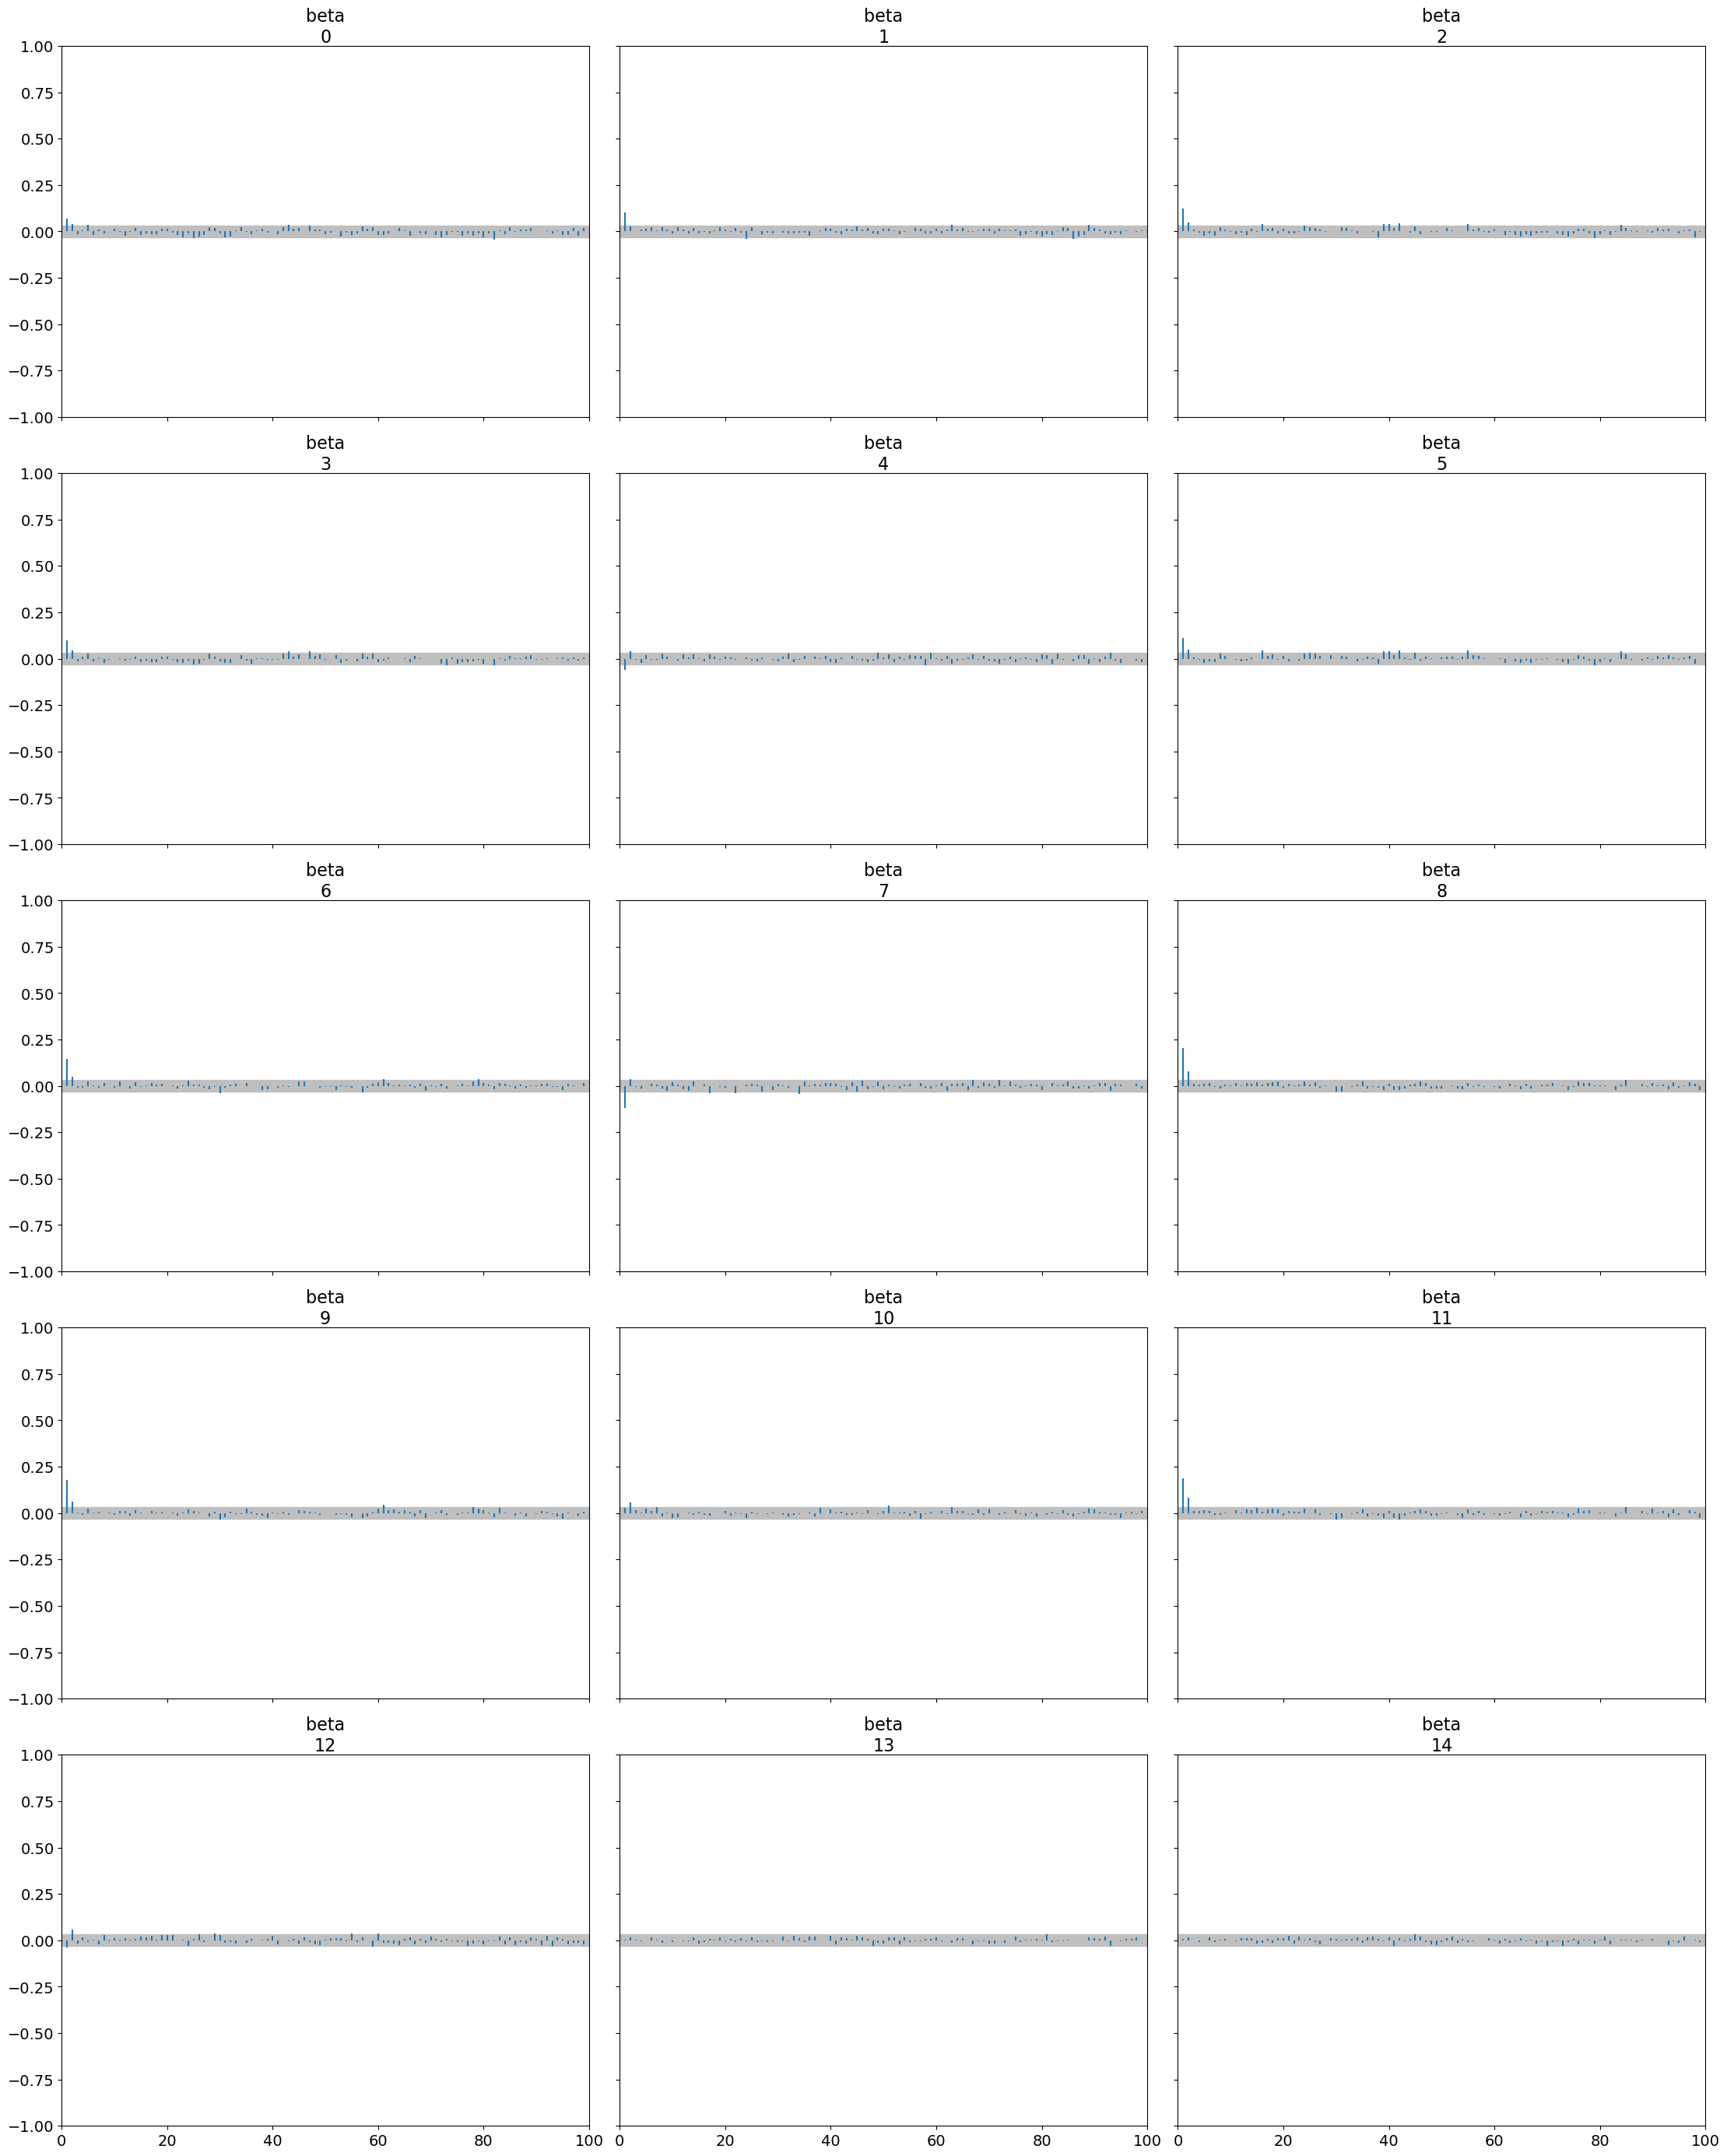

In [ ]:
az.plot_autocorr(free_fix_cog_trace, combined=True);

##### Predictions

In [ ]:
free_fix_cog_features_test, free_fix_cog_labels_test, free_sac_cog_features_test, free_sac_cog_labels_test =  loader.get_eyeT_features_and_labels(dset="test", type="cognitive", experiment="free")
free_fix_cog_labels_test_class = modeler.make_labels_binary(free_fix_cog_labels_test, free_viewing_cognitive_empathy_median)
free_fix_cog_predictions = modeler.generate_model_predictions(free_fix_cog_empathy, free_fix_cog_features_test, free_fix_cog_trace)
free_fix_cog_predictions_class = modeler.make_labels_binary(free_fix_cog_predictions, 0.5)
accuracy_score(free_fix_cog_labels_test_class, free_fix_cog_predictions_class)

0.5460413897854566

#### __Saccades__

In [ ]:
free_sac_cog_labels_train_class = modeler.make_labels_binary(free_sac_cog_labels_train, free_viewing_cognitive_empathy_median)
free_sac_cog_empathy, free_sac_cog_trace = modeler.generate_logistic_regression_model("free_sac_cognitive_logistic_regression", free_sac_cog_features_train, free_sac_cog_labels_train_class)

Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 421 seconds.


Saving model...


##### Sampling diagnostics

In [ ]:
az.summary(free_sac_cog_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  -0.002  0.759  -1.382    1.448      0.014    0.012    2809.0   
beta[1]  -2.175  0.196  -2.559   -1.823      0.003    0.002    3254.0   
beta[2]  -1.840  1.484  -4.565    0.957      0.031    0.022    2322.0   
beta[3]  -0.858  1.294  -3.291    1.598      0.024    0.019    3002.0   
beta[4]  -1.061  1.140  -3.223    1.066      0.020    0.015    3151.0   
beta[5]   0.927  1.102  -1.143    2.955      0.022    0.016    2435.0   
beta[6]   0.093  0.544  -0.950    1.085      0.012    0.008    2081.0   
beta[7]  -0.024  0.096  -0.203    0.159      0.001    0.001    4221.0   
beta[8]   0.531  0.484  -0.415    1.404      0.010    0.007    2388.0   
beta[9]  -1.258  0.722  -2.600    0.104      0.017    0.012    1911.0   
beta[10]  1.210  0.374   0.509    1.925      0.008    0.006    2136.0   
beta[11] -1.817  0.504  -2.752   -0.851      0.010    0.007    2559.0   
beta[12]  0.187  0.098  -0.011    0.359      0.001    0.001    4398.0   
beta[13] -2.075  0.339  -2.710   -1.445      0.006    0.004    2947.0   
beta[14]  1.695  0.338   1.036    2.318      0.005    0.004    3959.0   
beta[15]  1.464  0.417   0.663    2.245      0.007    0.005    3422.0   
beta[16]  2.363  0.447   1.535    3.224      0.008    0.006    3313.0   

          ess_tail  r_hat  
beta[0]     2832.0    1.0  
beta[1]     2625.0    1.0  
beta[2]     2563.0    1.0  
beta[3]     2653.0    1.0  
beta[4]     2437.0    1.0  
beta[5]     2633.0    1.0  
beta[6]     2057.0    1.0  
beta[7]     3150.0    1.0  
beta[8]     2527.0    1.0  
beta[9]     2057.0    1.0  
beta[10]    2406.0    1.0  
beta[11]    2475.0    1.0  
beta[12]    2999.0    1.0  
beta[13]    3089.0    1.0  
beta[14]    3382.0    1.0  
beta[15]    2896.0    1.0  
beta[16]    3000.0    1.0

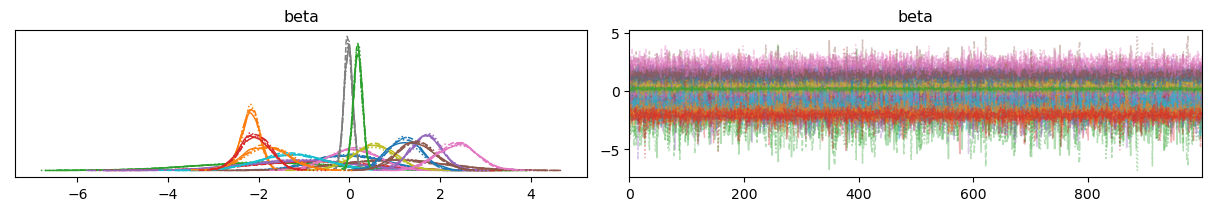

In [ ]:
az.plot_trace(free_sac_cog_trace);

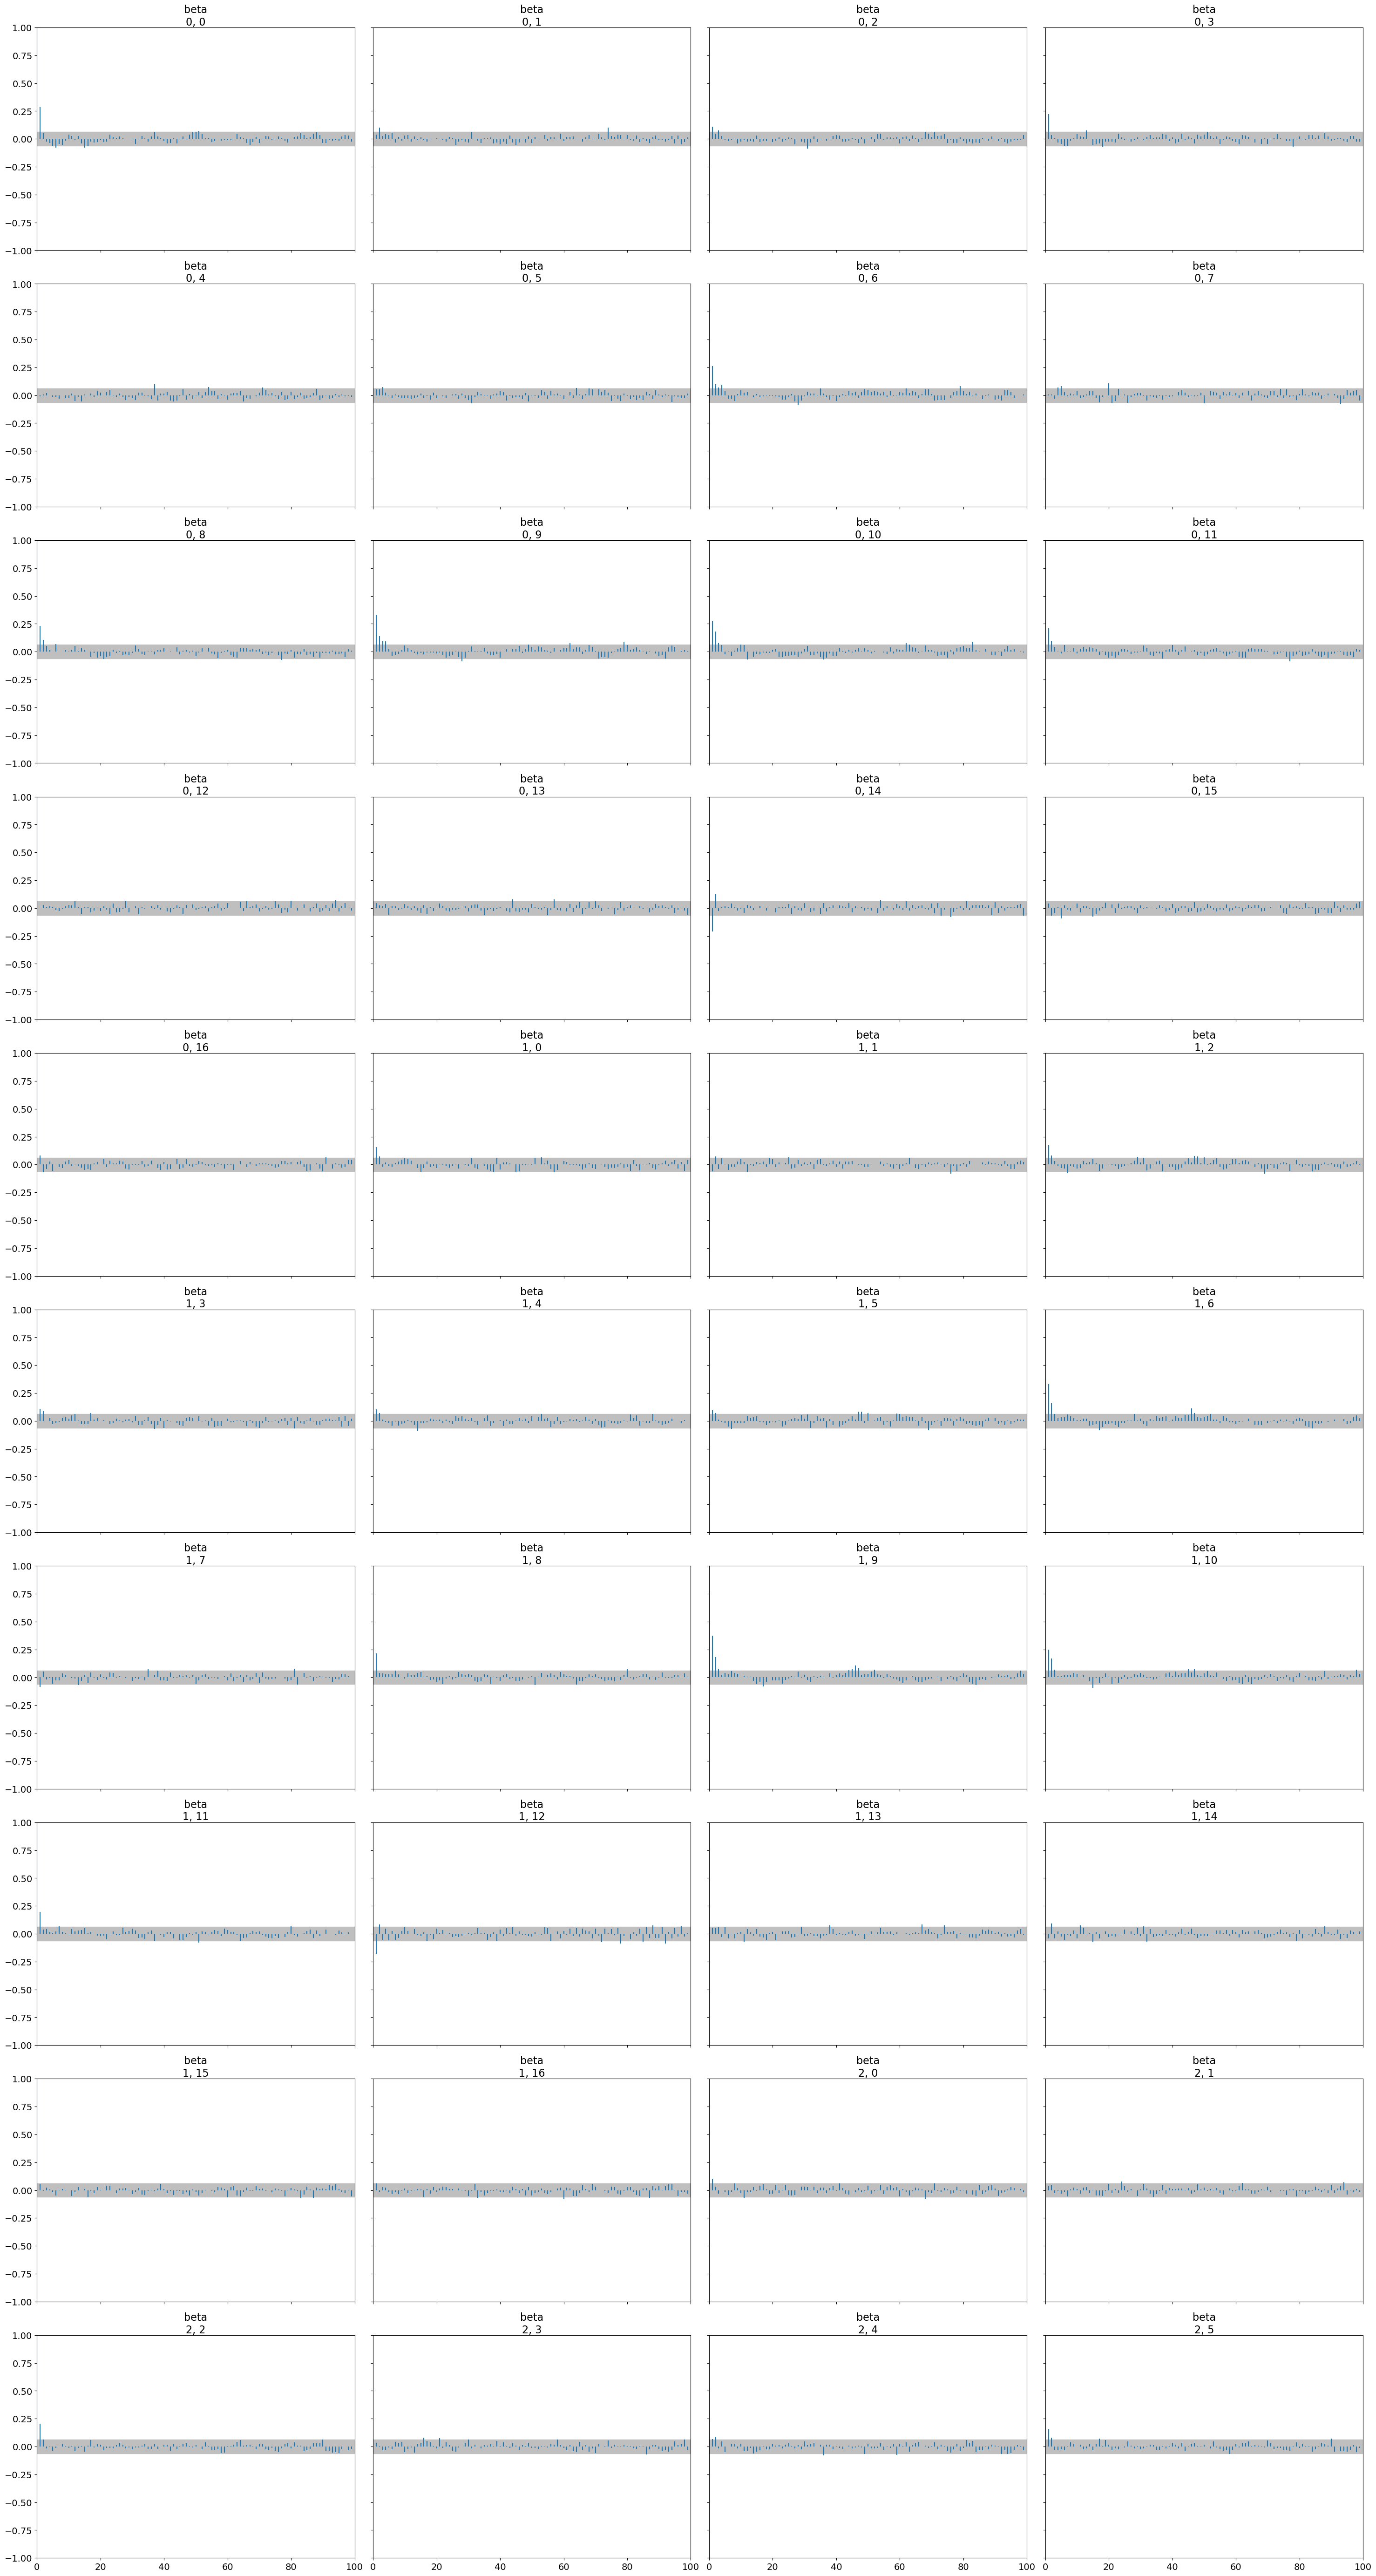

In [ ]:
az.plot_autocorr(free_sac_cog_trace);

##### Predictions

In [ ]:
free_sac_cog_labels_test_class = modeler.make_labels_binary(free_sac_cog_labels_test, free_viewing_cognitive_empathy_median)
free_sac_cog_predictions = modeler.generate_model_predictions(free_sac_cog_empathy, free_sac_cog_features_test, free_sac_cog_trace)
free_sac_cog_predictions_class = modeler.make_labels_binary(free_sac_cog_predictions, 0.5)
accuracy_score(free_sac_cog_labels_test_class, free_sac_cog_predictions_class)

0.6373692077727953

#### __Combined predictions__

In [ ]:
free_fix_stimuli, free_sac_stimuli = loader.get_stimuli("test", "free")

In [ ]:
predicted_cog_empathy = modeler.combine_predictions(free_fix_cog_predictions, free_fix_stimuli, free_sac_cog_predictions, free_sac_stimuli)
real_empathy_cog_values = [1 if free_viewing_cognitive_empathy[k[1]] >= free_viewing_cognitive_empathy_median else 0 for k in predicted_cog_empathy.keys()]
predicted_empathy_cog_values = [1 if level >= 0.5 else 0 for level in list(predicted_cog_empathy.values())]
accuracy_score(predicted_empathy_cog_values, real_empathy_cog_values)

0.65

### __Affective empathy__

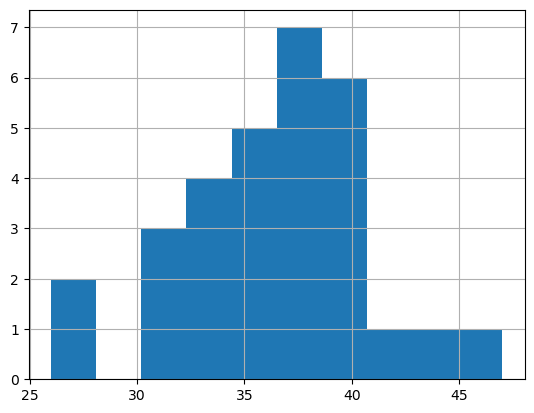

In [ ]:
free_viewing_affective_empathy = loader.load_eyeT_empathy_levels(experiment= "free", type="affective")
free_viewing_affective_empathy.hist();
free_viewing_affective_empathy_median = free_viewing_affective_empathy.median()

#### __Fixations__

In [ ]:
free_fix_aff_features_train, free_fix_aff_labels_train, free_sac_aff_features_train, free_sac_aff_labels_train =  loader.get_eyeT_features_and_labels(dset="train", type="affective", experiment="free")
free_fix_aff_labels_train_class = modeler.make_labels_binary(free_fix_aff_labels_train, free_viewing_affective_empathy_median)
free_fix_aff_empathy, free_fix_aff_trace = modeler.generate_logistic_regression_model("free_fix_affective_logistic_regression", free_fix_aff_features_train, free_fix_aff_labels_train_class)

Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 558 seconds.


Saving model...


##### Sampling diagnostics

In [ ]:
az.summary(free_fix_aff_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   5.144  3.354  -0.820   11.303      0.057    0.044    3545.0   
beta[1]   1.513  0.237   1.057    1.944      0.004    0.003    2978.0   
beta[2]   9.210  2.821   3.948   14.563      0.051    0.036    3048.0   
beta[3]  -2.459  2.387  -6.991    1.759      0.040    0.033    3559.0   
beta[4]  -0.103  0.438  -0.940    0.705      0.007    0.007    4242.0   
beta[5]  -3.670  1.857  -7.163   -0.173      0.033    0.024    3094.0   
beta[6]   0.380  0.866  -1.252    2.033      0.017    0.013    2471.0   
beta[7]  -1.237  0.117  -1.454   -1.016      0.002    0.001    4933.0   
beta[8]  -1.286  0.678  -2.621   -0.088      0.014    0.011    2277.0   
beta[9]  -1.912  0.996  -3.888   -0.117      0.021    0.015    2280.0   
beta[10]  1.353  0.382   0.645    2.063      0.007    0.005    2764.0   
beta[11]  1.089  0.667  -0.118    2.400      0.014    0.010    2369.0   
beta[12]  3.220  0.554   2.220    4.283      0.008    0.006    4271.0   
beta[13]  2.990  0.339   2.353    3.619      0.006    0.004    3457.0   
beta[14] -5.082  0.395  -5.818   -4.337      0.007    0.005    3460.0   

          ess_tail  r_hat  
beta[0]     2573.0    1.0  
beta[1]     2831.0    1.0  
beta[2]     2999.0    1.0  
beta[3]     2605.0    1.0  
beta[4]     2892.0    1.0  
beta[5]     3081.0    1.0  
beta[6]     2613.0    1.0  
beta[7]     2950.0    1.0  
beta[8]     2315.0    1.0  
beta[9]     2667.0    1.0  
beta[10]    2622.0    1.0  
beta[11]    2355.0    1.0  
beta[12]    3010.0    1.0  
beta[13]    2906.0    1.0  
beta[14]    3053.0    1.0

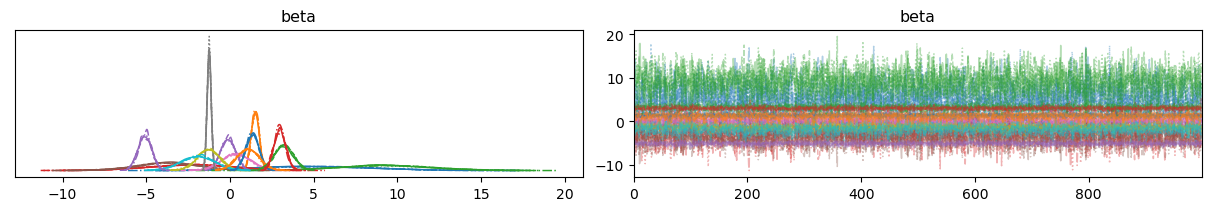

In [ ]:
az.plot_trace(free_fix_aff_trace);

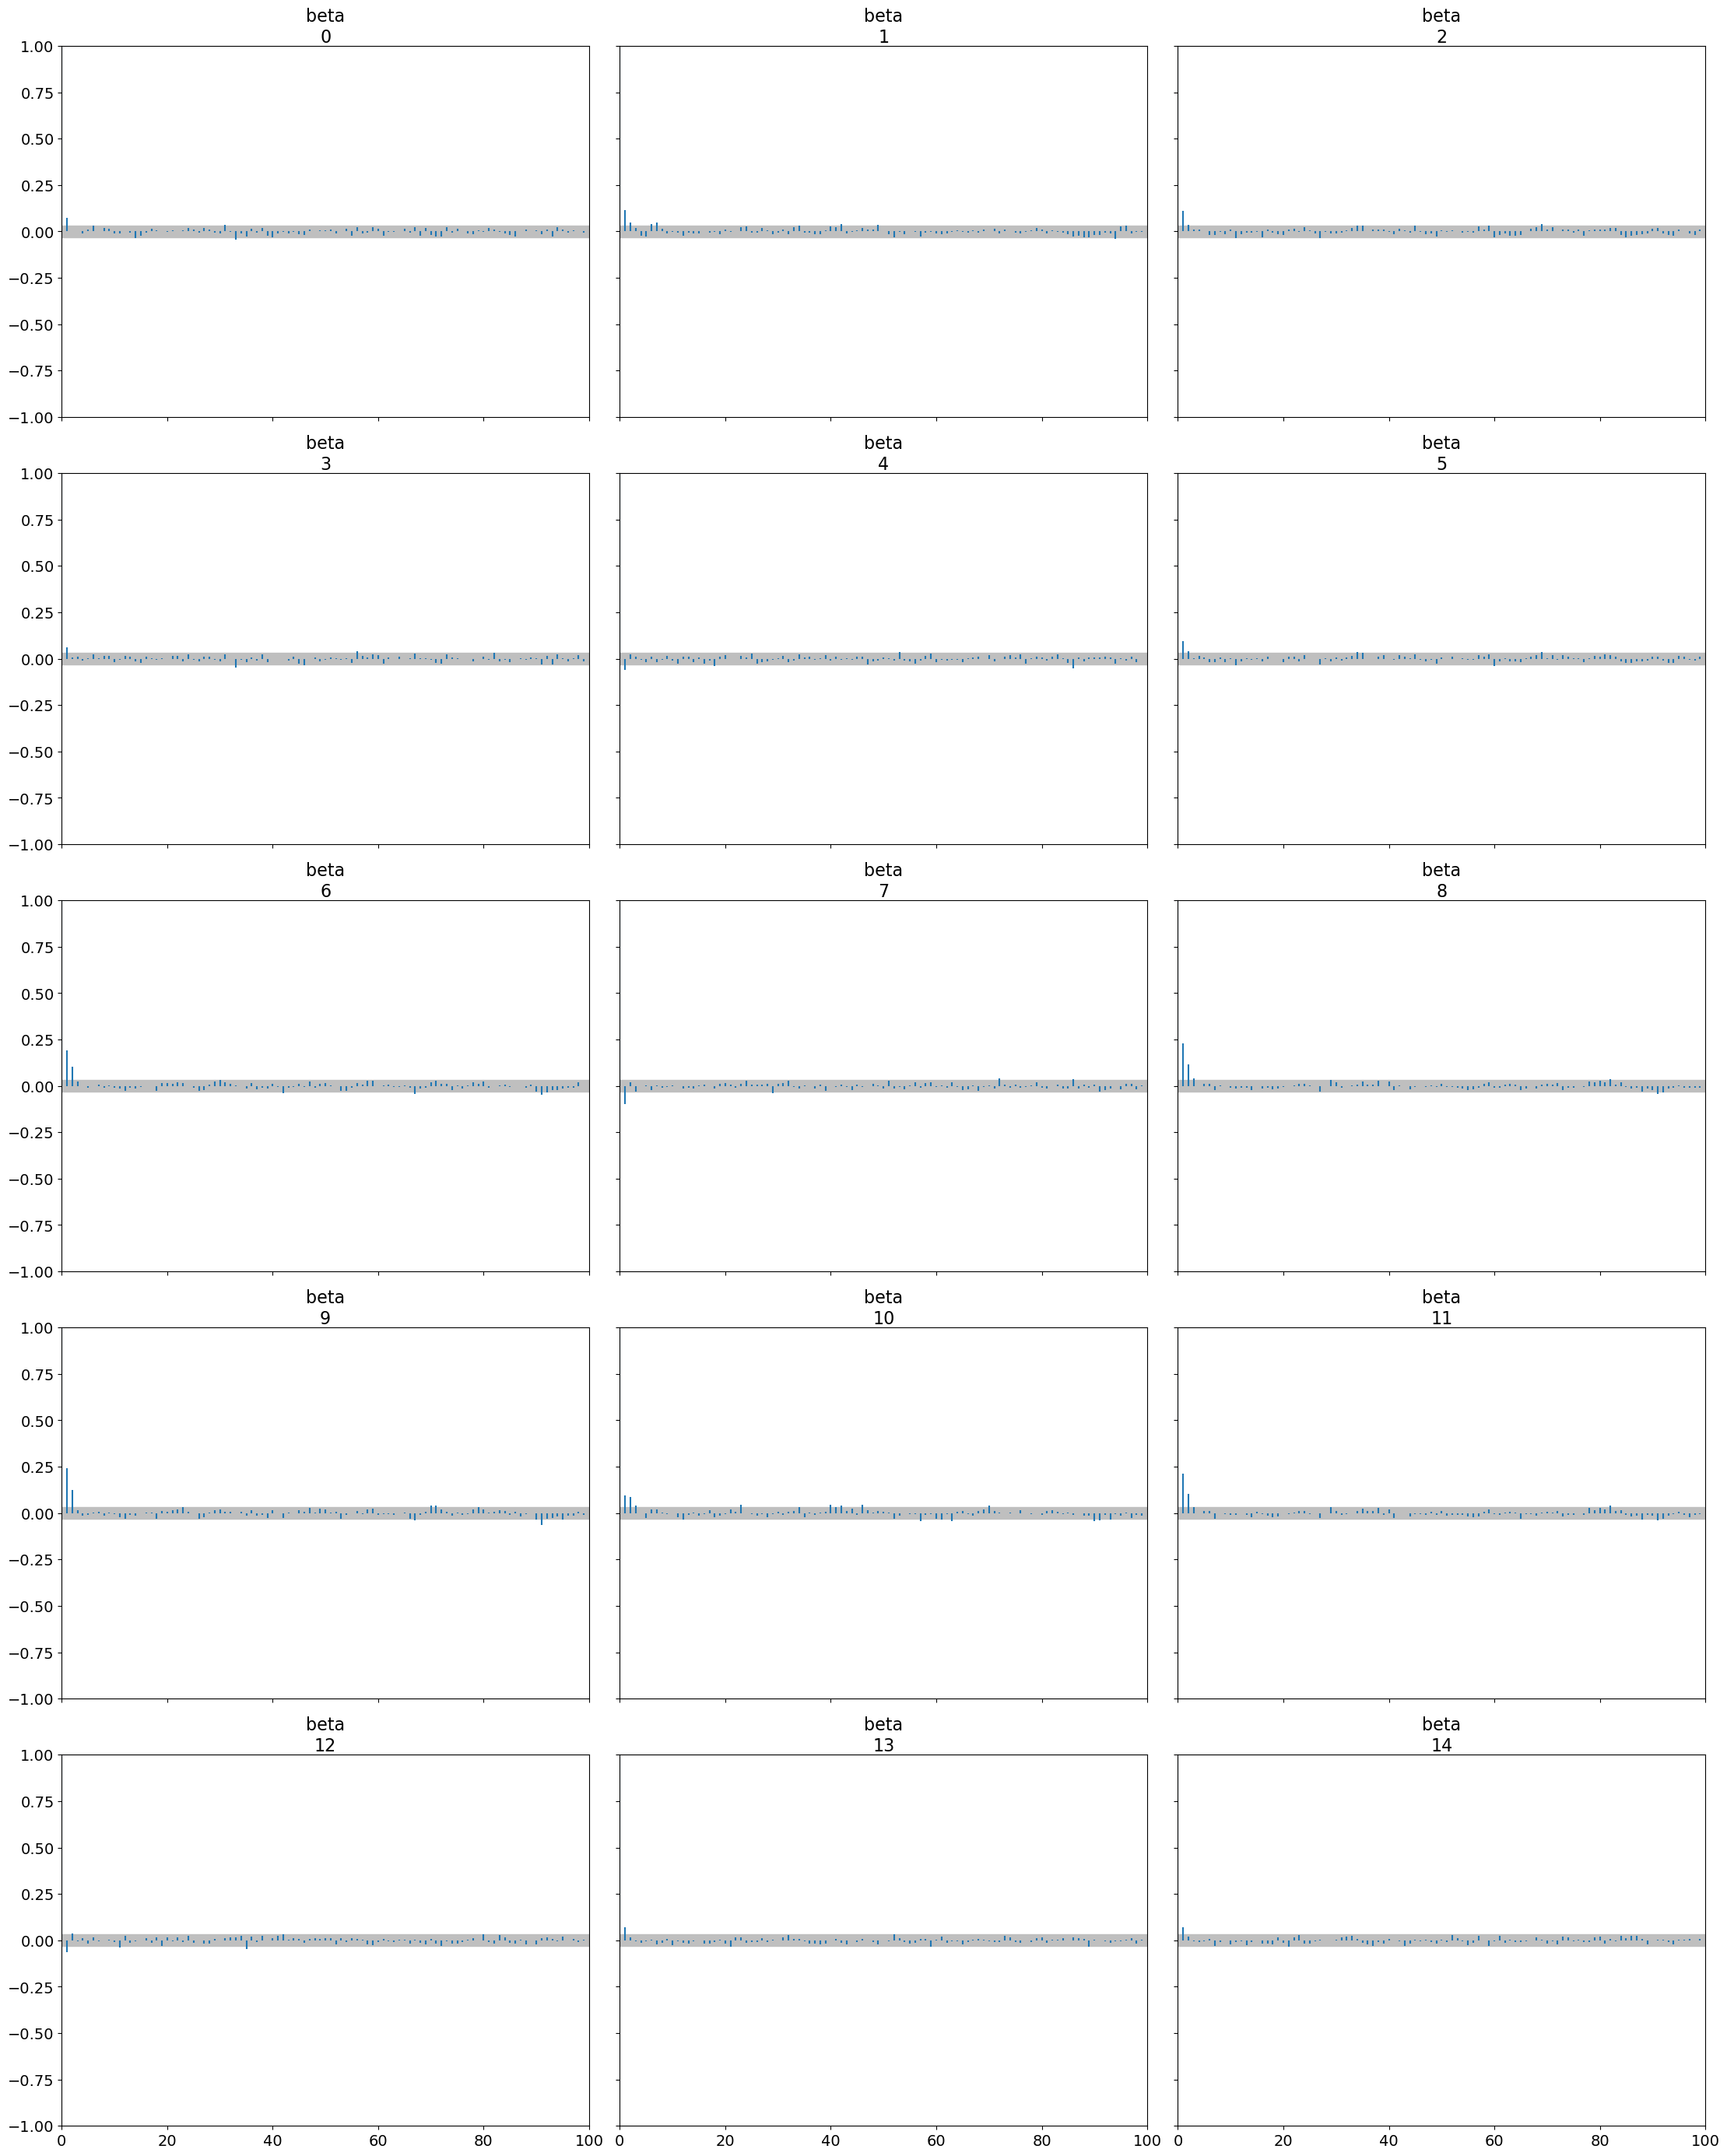

In [ ]:
az.plot_autocorr(free_fix_aff_trace, combined=True);

##### Predictions

In [ ]:
free_fix_aff_features_test, free_fix_aff_labels_test, free_sac_aff_features_test, free_sac_aff_labels_test =  loader.get_eyeT_features_and_labels(dset="test", type="affective", experiment="free")
free_fix_aff_labels_test_class = modeler.make_labels_binary(free_fix_aff_labels_test, free_viewing_affective_empathy_median)
free_fix_aff_predictions = modeler.generate_model_predictions(free_fix_aff_empathy, free_fix_aff_features_test, free_fix_aff_trace)
free_fix_aff_predictions_class = modeler.make_labels_binary(free_fix_aff_predictions, 0.5)
accuracy_score(free_fix_aff_labels_test_class, free_fix_aff_predictions_class)

0.6548319726599582

#### __Saccades__

In [ ]:
free_sac_aff_labels_train_class = modeler.make_labels_binary(free_sac_aff_labels_train, free_viewing_affective_empathy_median)
free_sac_aff_empathy, free_sac_aff_trace = modeler.generate_logistic_regression_model("free_sac_affective_logistic_regression", free_sac_aff_features_train, free_sac_aff_labels_train_class)

Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 433 seconds.


Saving model...


##### Sampling diagnostics

In [ ]:
az.summary(free_sac_aff_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   0.891  0.674  -0.425    2.084      0.012    0.009    2910.0   
beta[1]   0.376  0.191   0.022    0.735      0.003    0.003    3041.0   
beta[2]  -0.405  1.478  -3.127    2.430      0.031    0.022    2220.0   
beta[3]  -3.231  1.188  -5.379   -0.932      0.022    0.016    3005.0   
beta[4]   0.728  1.140  -1.377    2.920      0.021    0.016    2885.0   
beta[5]   4.088  1.076   2.074    6.061      0.022    0.016    2331.0   
beta[6]  -0.391  0.511  -1.379    0.546      0.011    0.008    2218.0   
beta[7]  -0.370  0.090  -0.540   -0.196      0.001    0.001    4259.0   
beta[8]   0.051  0.448  -0.777    0.904      0.009    0.007    2409.0   
beta[9]   0.644  0.684  -0.653    1.923      0.015    0.011    1997.0   
beta[10]  0.236  0.359  -0.419    0.922      0.008    0.006    1978.0   
beta[11]  0.225  0.468  -0.685    1.078      0.009    0.007    2609.0   
beta[12] -0.288  0.095  -0.464   -0.107      0.001    0.001    4318.0   
beta[13] -0.028  0.302  -0.587    0.555      0.006    0.004    2448.0   
beta[14] -0.758  0.321  -1.348   -0.152      0.006    0.004    3269.0   
beta[15]  2.777  0.400   2.014    3.517      0.008    0.005    2643.0   
beta[16] -4.454  0.433  -5.276   -3.644      0.008    0.006    2642.0   

          ess_tail  r_hat  
beta[0]     2994.0    1.0  
beta[1]     3037.0    1.0  
beta[2]     2559.0    1.0  
beta[3]     3165.0    1.0  
beta[4]     2792.0    1.0  
beta[5]     2668.0    1.0  
beta[6]     2613.0    1.0  
beta[7]     2945.0    1.0  
beta[8]     2668.0    1.0  
beta[9]     2383.0    1.0  
beta[10]    3016.0    1.0  
beta[11]    2526.0    1.0  
beta[12]    2864.0    1.0  
beta[13]    2835.0    1.0  
beta[14]    2876.0    1.0  
beta[15]    2383.0    1.0  
beta[16]    2669.0    1.0

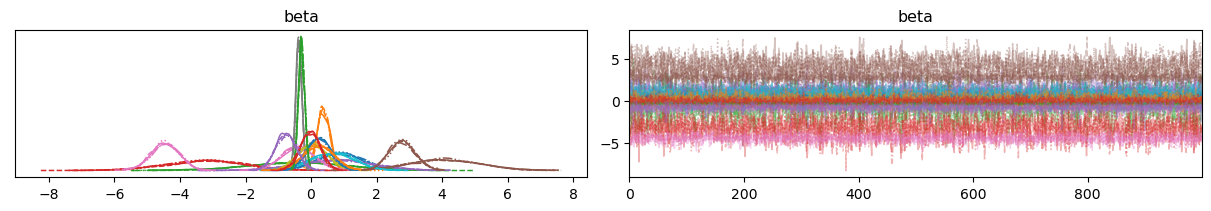

In [ ]:
az.plot_trace(free_sac_aff_trace);

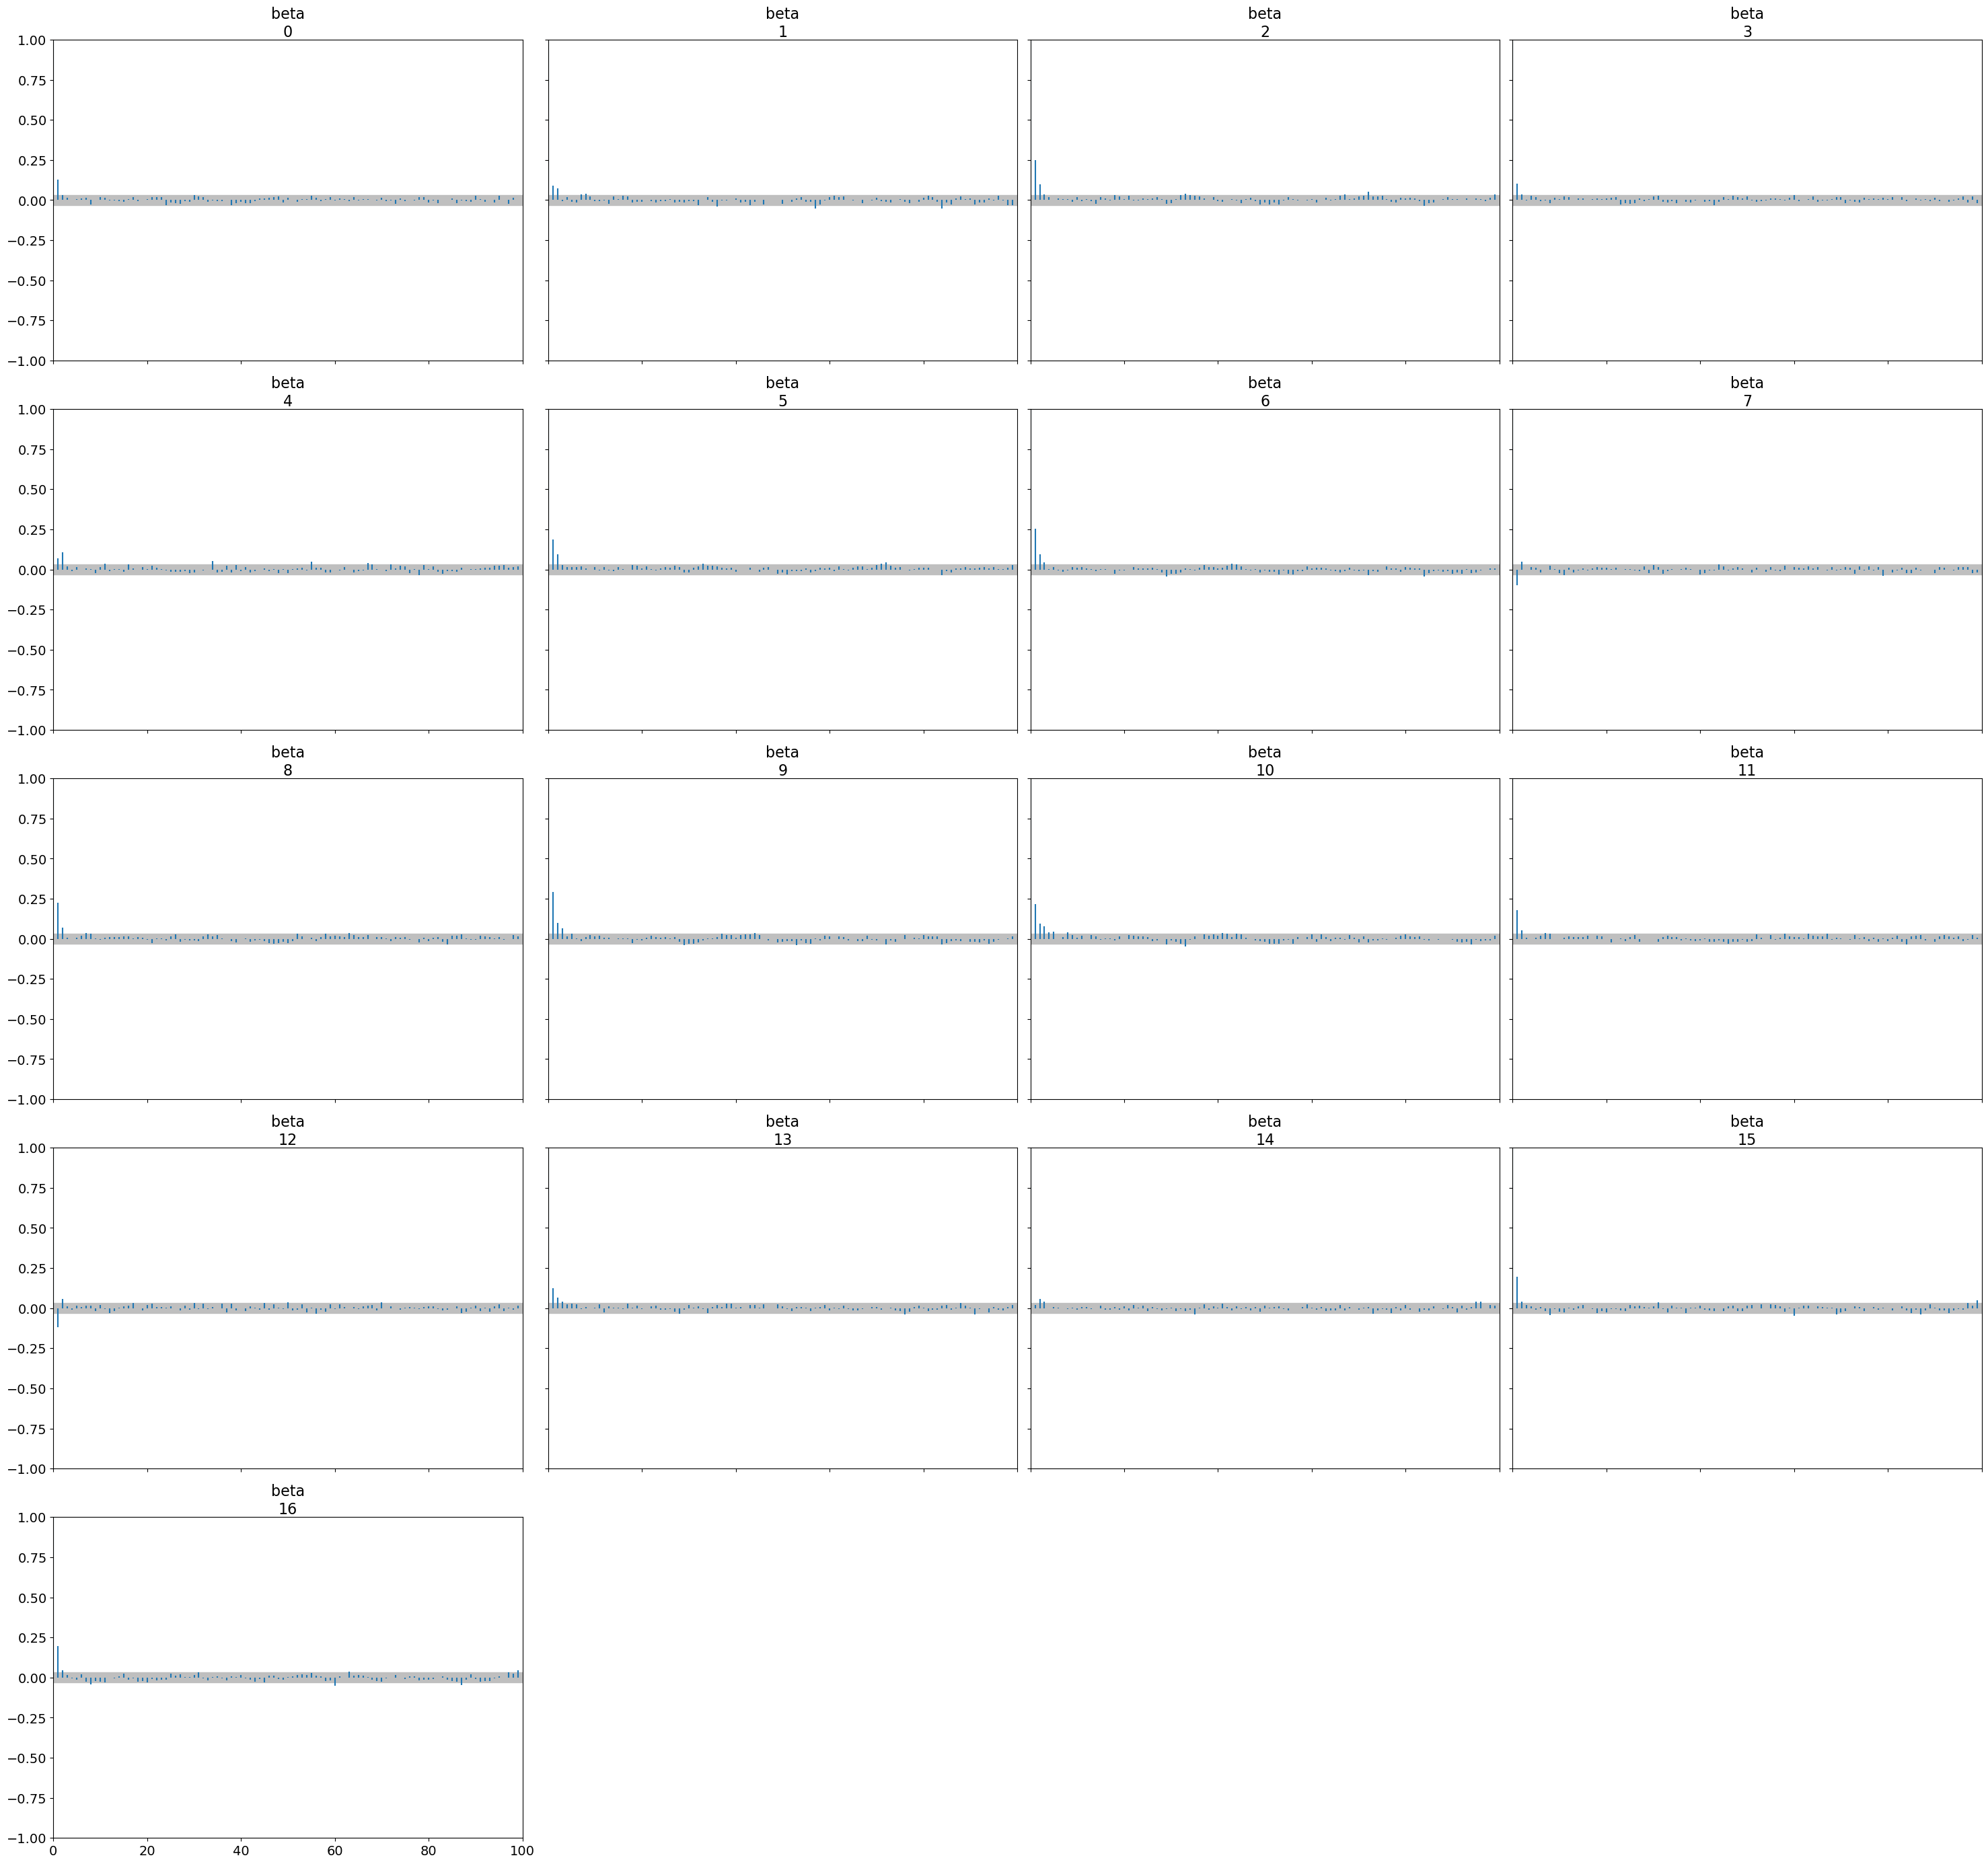

In [ ]:
az.plot_autocorr(free_sac_aff_trace, combined=True);

##### Predictions

In [ ]:
free_sac_aff_labels_test_class = modeler.make_labels_binary(free_sac_aff_labels_test, free_viewing_affective_empathy_median)
free_sac_aff_predictions = modeler.generate_model_predictions(free_sac_aff_empathy, free_sac_aff_features_test, free_sac_aff_trace)
free_sac_aff_predictions_class = modeler.make_labels_binary(free_sac_aff_predictions, 0.5)
accuracy_score(free_sac_aff_labels_test_class, free_sac_aff_predictions_class)

0.6618834080717488

#### __Combined predictions__

In [ ]:
free_fix_stimuli, free_sac_stimuli = loader.get_stimuli("test", "free")
predicted_aff_empathy = modeler.combine_predictions(free_fix_aff_predictions, free_fix_stimuli, free_sac_aff_predictions, free_sac_stimuli)
real_empathy_aff_values = [1 if free_viewing_affective_empathy[k[1]] >= free_viewing_affective_empathy_median else 0 for k in predicted_aff_empathy.keys()]
predicted_empathy_aff_values = [1 if level >= 0.5 else 0 for level in list(predicted_aff_empathy.values())]
accuracy_score(predicted_empathy_aff_values, real_empathy_aff_values)

0.7

# __Task oriented viewing__

### __General empathy__

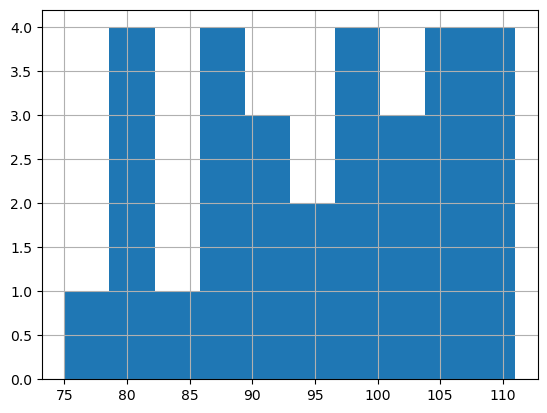

In [ ]:
task_oriented_empathy = loader.load_eyeT_empathy_levels(experiment= "task")
task_oriented_empathy.hist();
task_oriented_empathy_median = task_oriented_empathy.median()

#### __Fixations__

In [ ]:
task_fix_features_train, task_fix_labels_train, task_sac_features_train, task_sac_labels_train =  loader.get_eyeT_features_and_labels("train", "task")
task_fix_labels_train_class = modeler.make_labels_binary(task_fix_labels_train, task_oriented_empathy_median)
task_fix_empathy, task_fix_empathy_trace = modeler.generate_logistic_regression_model("task_fix_logistic_regression", task_fix_features_train, task_fix_labels_train_class)

##### Sampling diagnostics

In [ ]:
az.summary(task_fix_empathy_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  -1.046  4.885  -9.731    8.375      0.093    0.081    2829.0   
beta[1]   0.613  0.096   0.434    0.783      0.002    0.001    2519.0   
beta[2]   7.713  0.900   5.961    9.402      0.019    0.014    2170.0   
beta[3]   5.095  2.405   0.433    9.450      0.044    0.032    2922.0   
beta[4]   0.349  0.194  -0.013    0.704      0.003    0.002    4180.0   
beta[5]  -7.961  0.700  -9.243   -6.584      0.015    0.010    2244.0   
beta[6]  -1.240  0.427  -2.092   -0.486      0.009    0.006    2359.0   
beta[7]   0.120  0.052   0.020    0.218      0.001    0.001    4445.0   
beta[8]  -1.858  0.309  -2.449   -1.292      0.007    0.005    1977.0   
beta[9]   1.076  0.475   0.239    2.012      0.010    0.007    2139.0   
beta[10]  0.181  0.182  -0.164    0.520      0.004    0.003    2689.0   
beta[11]  0.843  0.299   0.292    1.409      0.007    0.005    1983.0   
beta[12] -0.092  0.199  -0.456    0.298      0.003    0.003    3506.0   
beta[13]  1.486  0.230   1.065    1.919      0.004    0.003    2883.0   
beta[14] -1.917  0.212  -2.324   -1.532      0.004    0.003    3052.0   

          ess_tail  r_hat  
beta[0]     2478.0    1.0  
beta[1]     2721.0    1.0  
beta[2]     2547.0    1.0  
beta[3]     2589.0    1.0  
beta[4]     3067.0    1.0  
beta[5]     2483.0    1.0  
beta[6]     2812.0    1.0  
beta[7]     3087.0    1.0  
beta[8]     2477.0    1.0  
beta[9]     2221.0    1.0  
beta[10]    2558.0    1.0  
beta[11]    2625.0    1.0  
beta[12]    2938.0    1.0  
beta[13]    2533.0    1.0  
beta[14]    2533.0    1.0

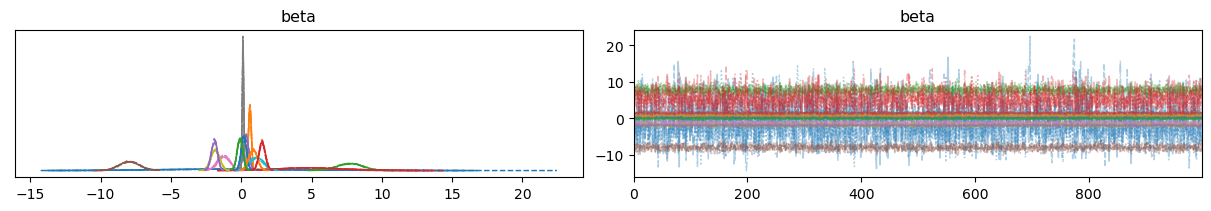

In [ ]:
az.plot_trace(task_fix_empathy_trace);

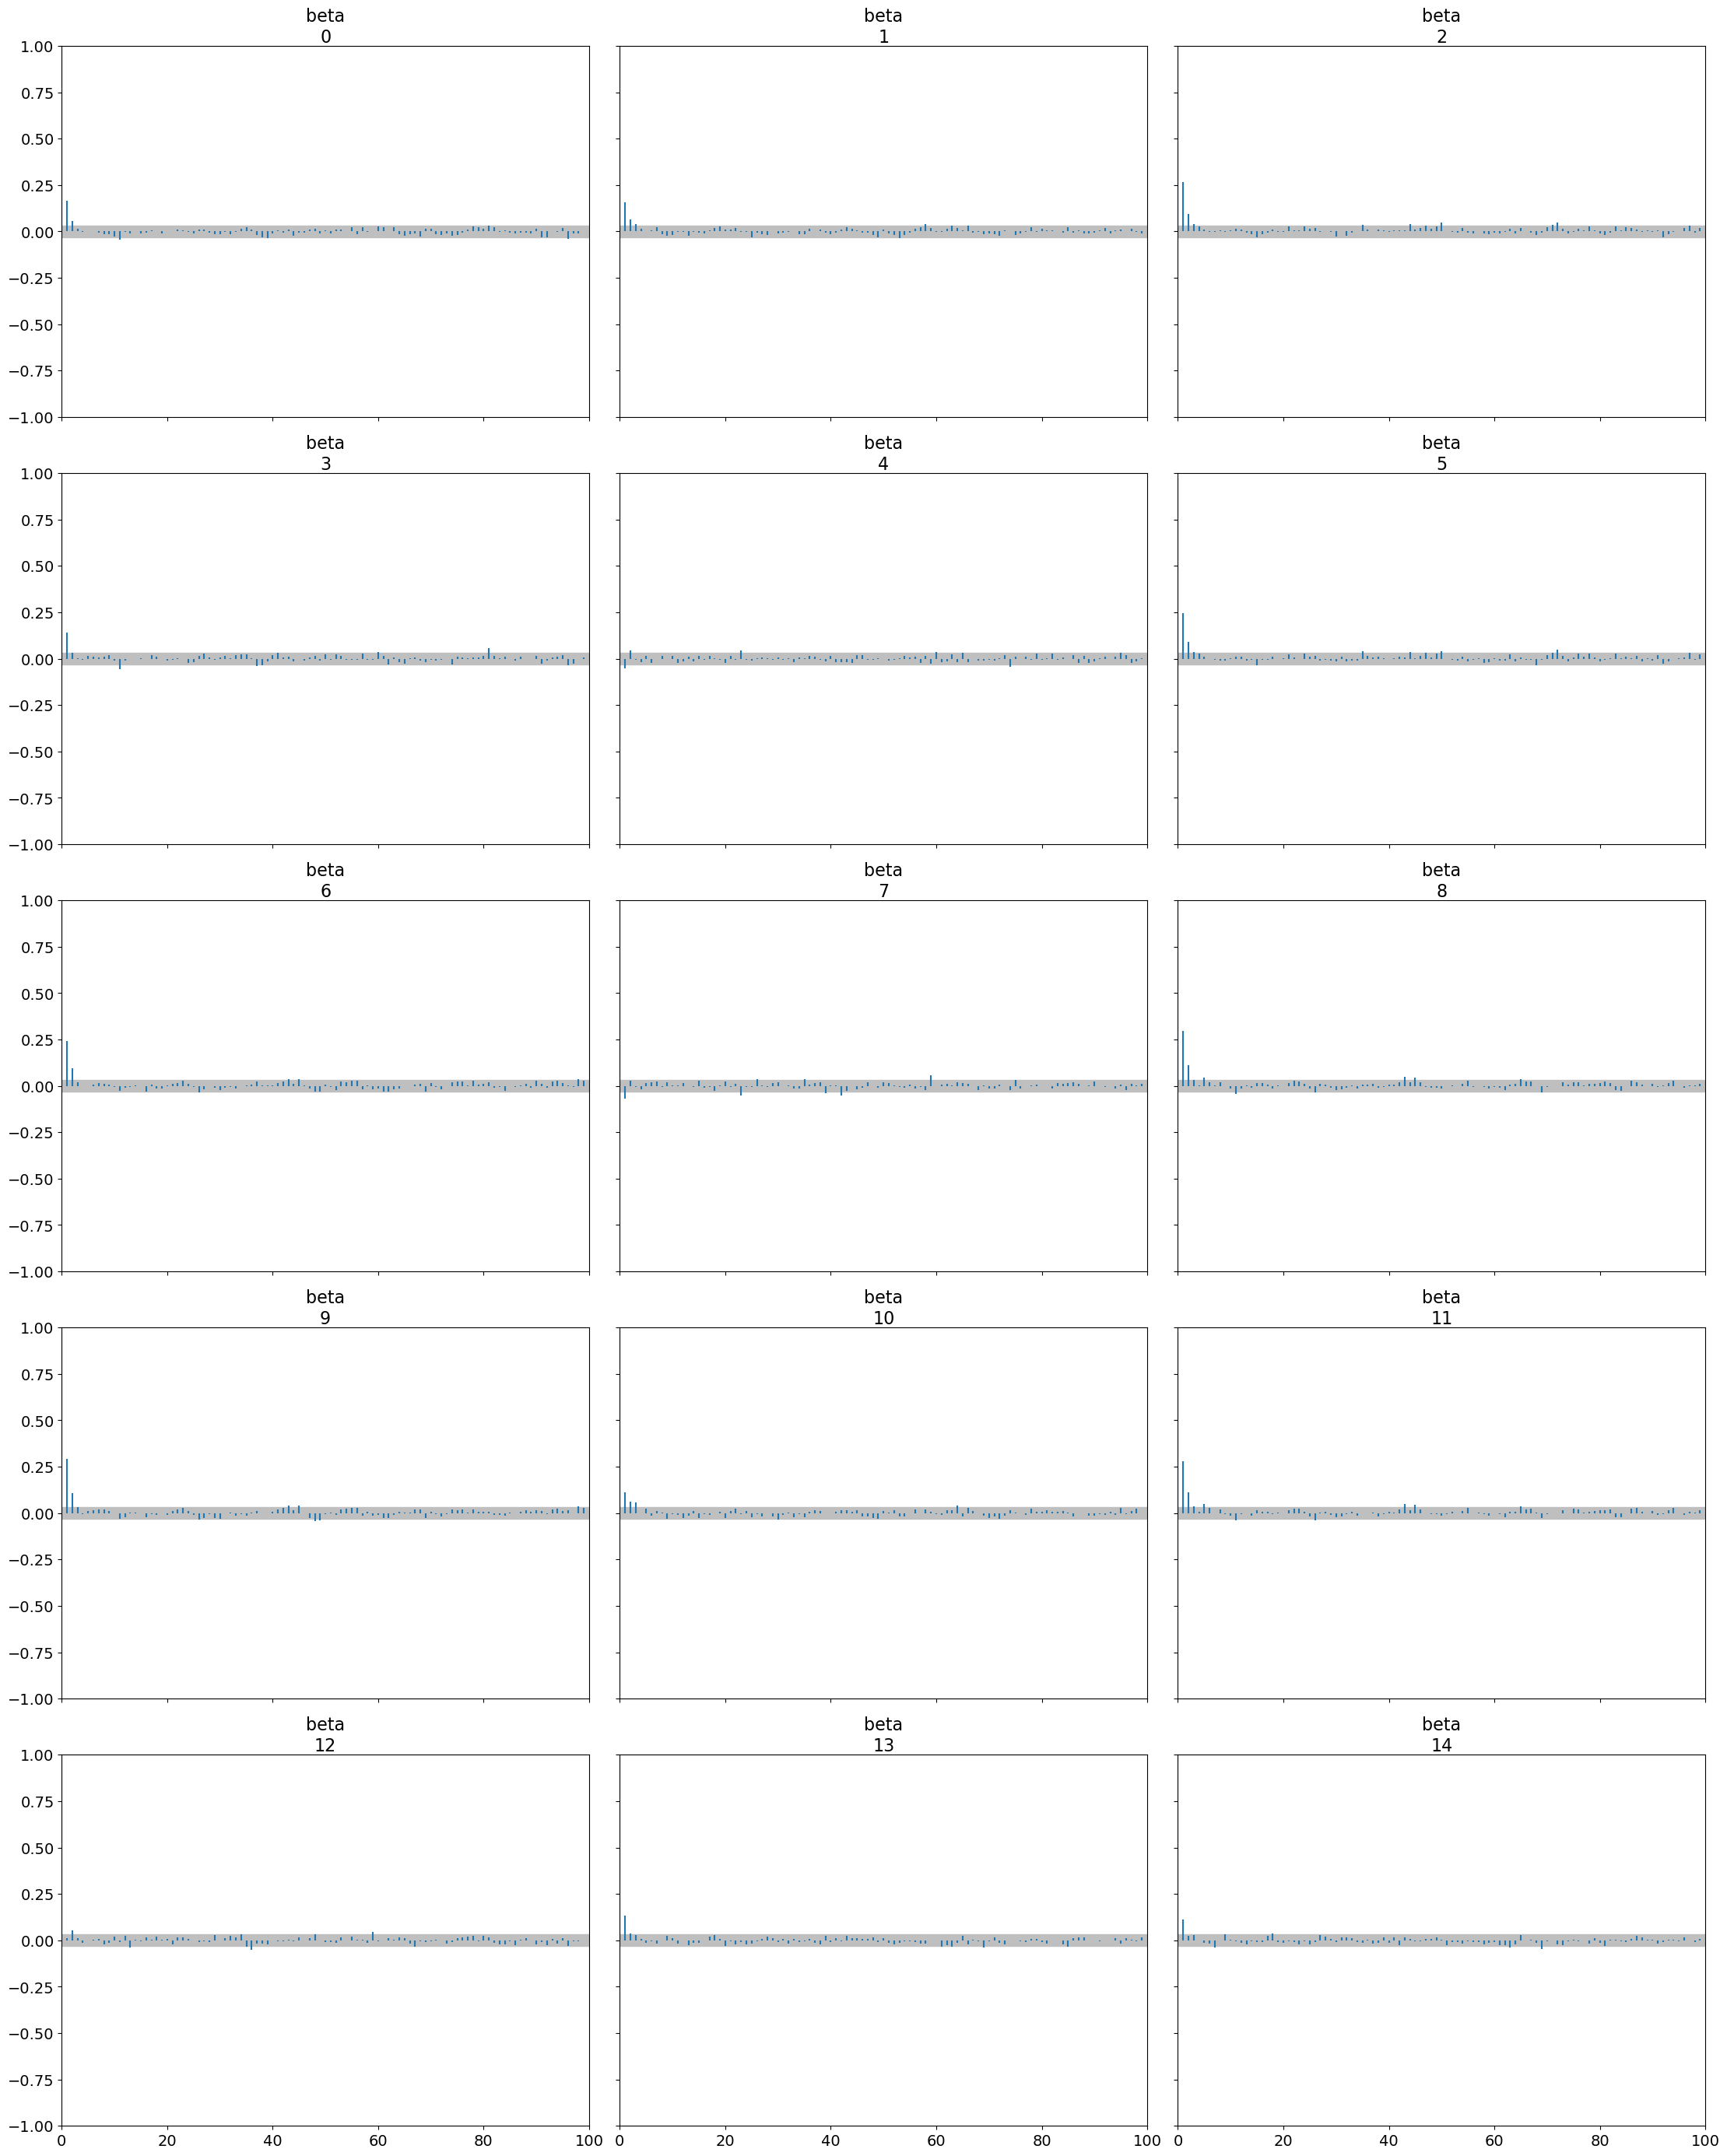

In [ ]:
az.plot_autocorr(task_fix_empathy_trace, combined=True);

##### Predictions

In [ ]:
task_fix_features_test, task_fix_labels_test, task_sac_features_test, task_sac_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="task")
task_fix_labels_test_class = modeler.make_labels_binary(task_fix_labels_test, task_oriented_empathy_median)
task_fix_predictions = modeler.generate_model_predictions(task_fix_empathy, task_fix_features_test, task_fix_empathy_trace)
task_fix_predictions_class = modeler.make_labels_binary(task_fix_predictions, 0.5)
accuracy_score(task_fix_labels_test_class, task_fix_predictions_class)

0.4674540257779216

#### __Saccades__

In [ ]:
task_sac_labels_train_class = modeler.make_labels_binary(task_sac_labels_train, task_oriented_empathy_median)
task_sac_empathy, task_sac_empathy_trace = modeler.generate_logistic_regression_model("task_sac_logistic_regression", task_sac_features_train, task_sac_labels_train_class)

Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 3032 seconds.


Saving model...


##### Sampling diagnostics

In [ ]:
az.summary(task_sac_empathy_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   1.833  0.341   1.233    2.506      0.007    0.005    2677.0   
beta[1]   1.359  0.113   1.158    1.578      0.002    0.001    2908.0   
beta[2]   3.027  0.821   1.498    4.564      0.017    0.012    2405.0   
beta[3]  -1.093  0.634  -2.291    0.067      0.012    0.009    2704.0   
beta[4]   0.136  0.443  -0.695    0.978      0.008    0.006    2882.0   
beta[5]  -3.568  0.600  -4.693   -2.445      0.012    0.008    2619.0   
beta[6]   0.841  0.238   0.384    1.270      0.005    0.003    2406.0   
beta[7]   0.129  0.039   0.059    0.207      0.001    0.000    4194.0   
beta[8]  -0.352  0.214  -0.751    0.050      0.004    0.003    2452.0   
beta[9]  -1.122  0.326  -1.707   -0.489      0.007    0.005    2256.0   
beta[10]  0.688  0.171   0.378    1.018      0.003    0.002    2465.0   
beta[11]  0.243  0.227  -0.181    0.670      0.005    0.004    2420.0   
beta[12]  0.247  0.040   0.170    0.319      0.001    0.000    4478.0   
beta[13]  0.466  0.131   0.212    0.702      0.002    0.002    3663.0   
beta[14] -0.822  0.119  -1.045   -0.602      0.002    0.001    3424.0   
beta[15] -1.911  0.250  -2.378   -1.455      0.005    0.003    2738.0   
beta[16] -1.202  0.224  -1.617   -0.794      0.004    0.003    2596.0   

          ess_tail  r_hat  
beta[0]     2536.0    1.0  
beta[1]     3187.0    1.0  
beta[2]     2668.0    1.0  
beta[3]     2643.0    1.0  
beta[4]     2580.0    1.0  
beta[5]     2848.0    1.0  
beta[6]     2170.0    1.0  
beta[7]     2869.0    1.0  
beta[8]     2567.0    1.0  
beta[9]     2122.0    1.0  
beta[10]    2642.0    1.0  
beta[11]    2642.0    1.0  
beta[12]    2853.0    1.0  
beta[13]    2933.0    1.0  
beta[14]    3251.0    1.0  
beta[15]    2766.0    1.0  
beta[16]    2705.0    1.0

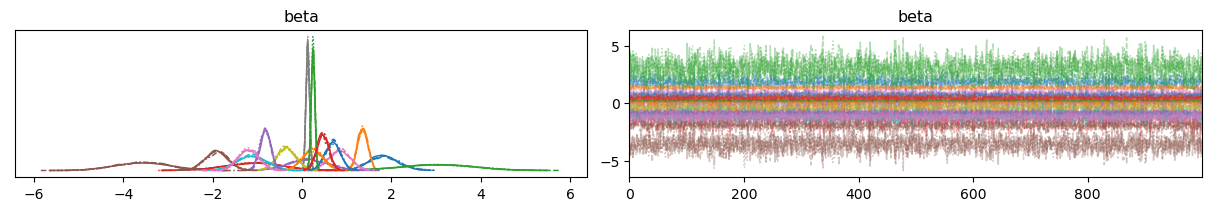

In [ ]:
az.plot_trace(task_sac_empathy_trace);

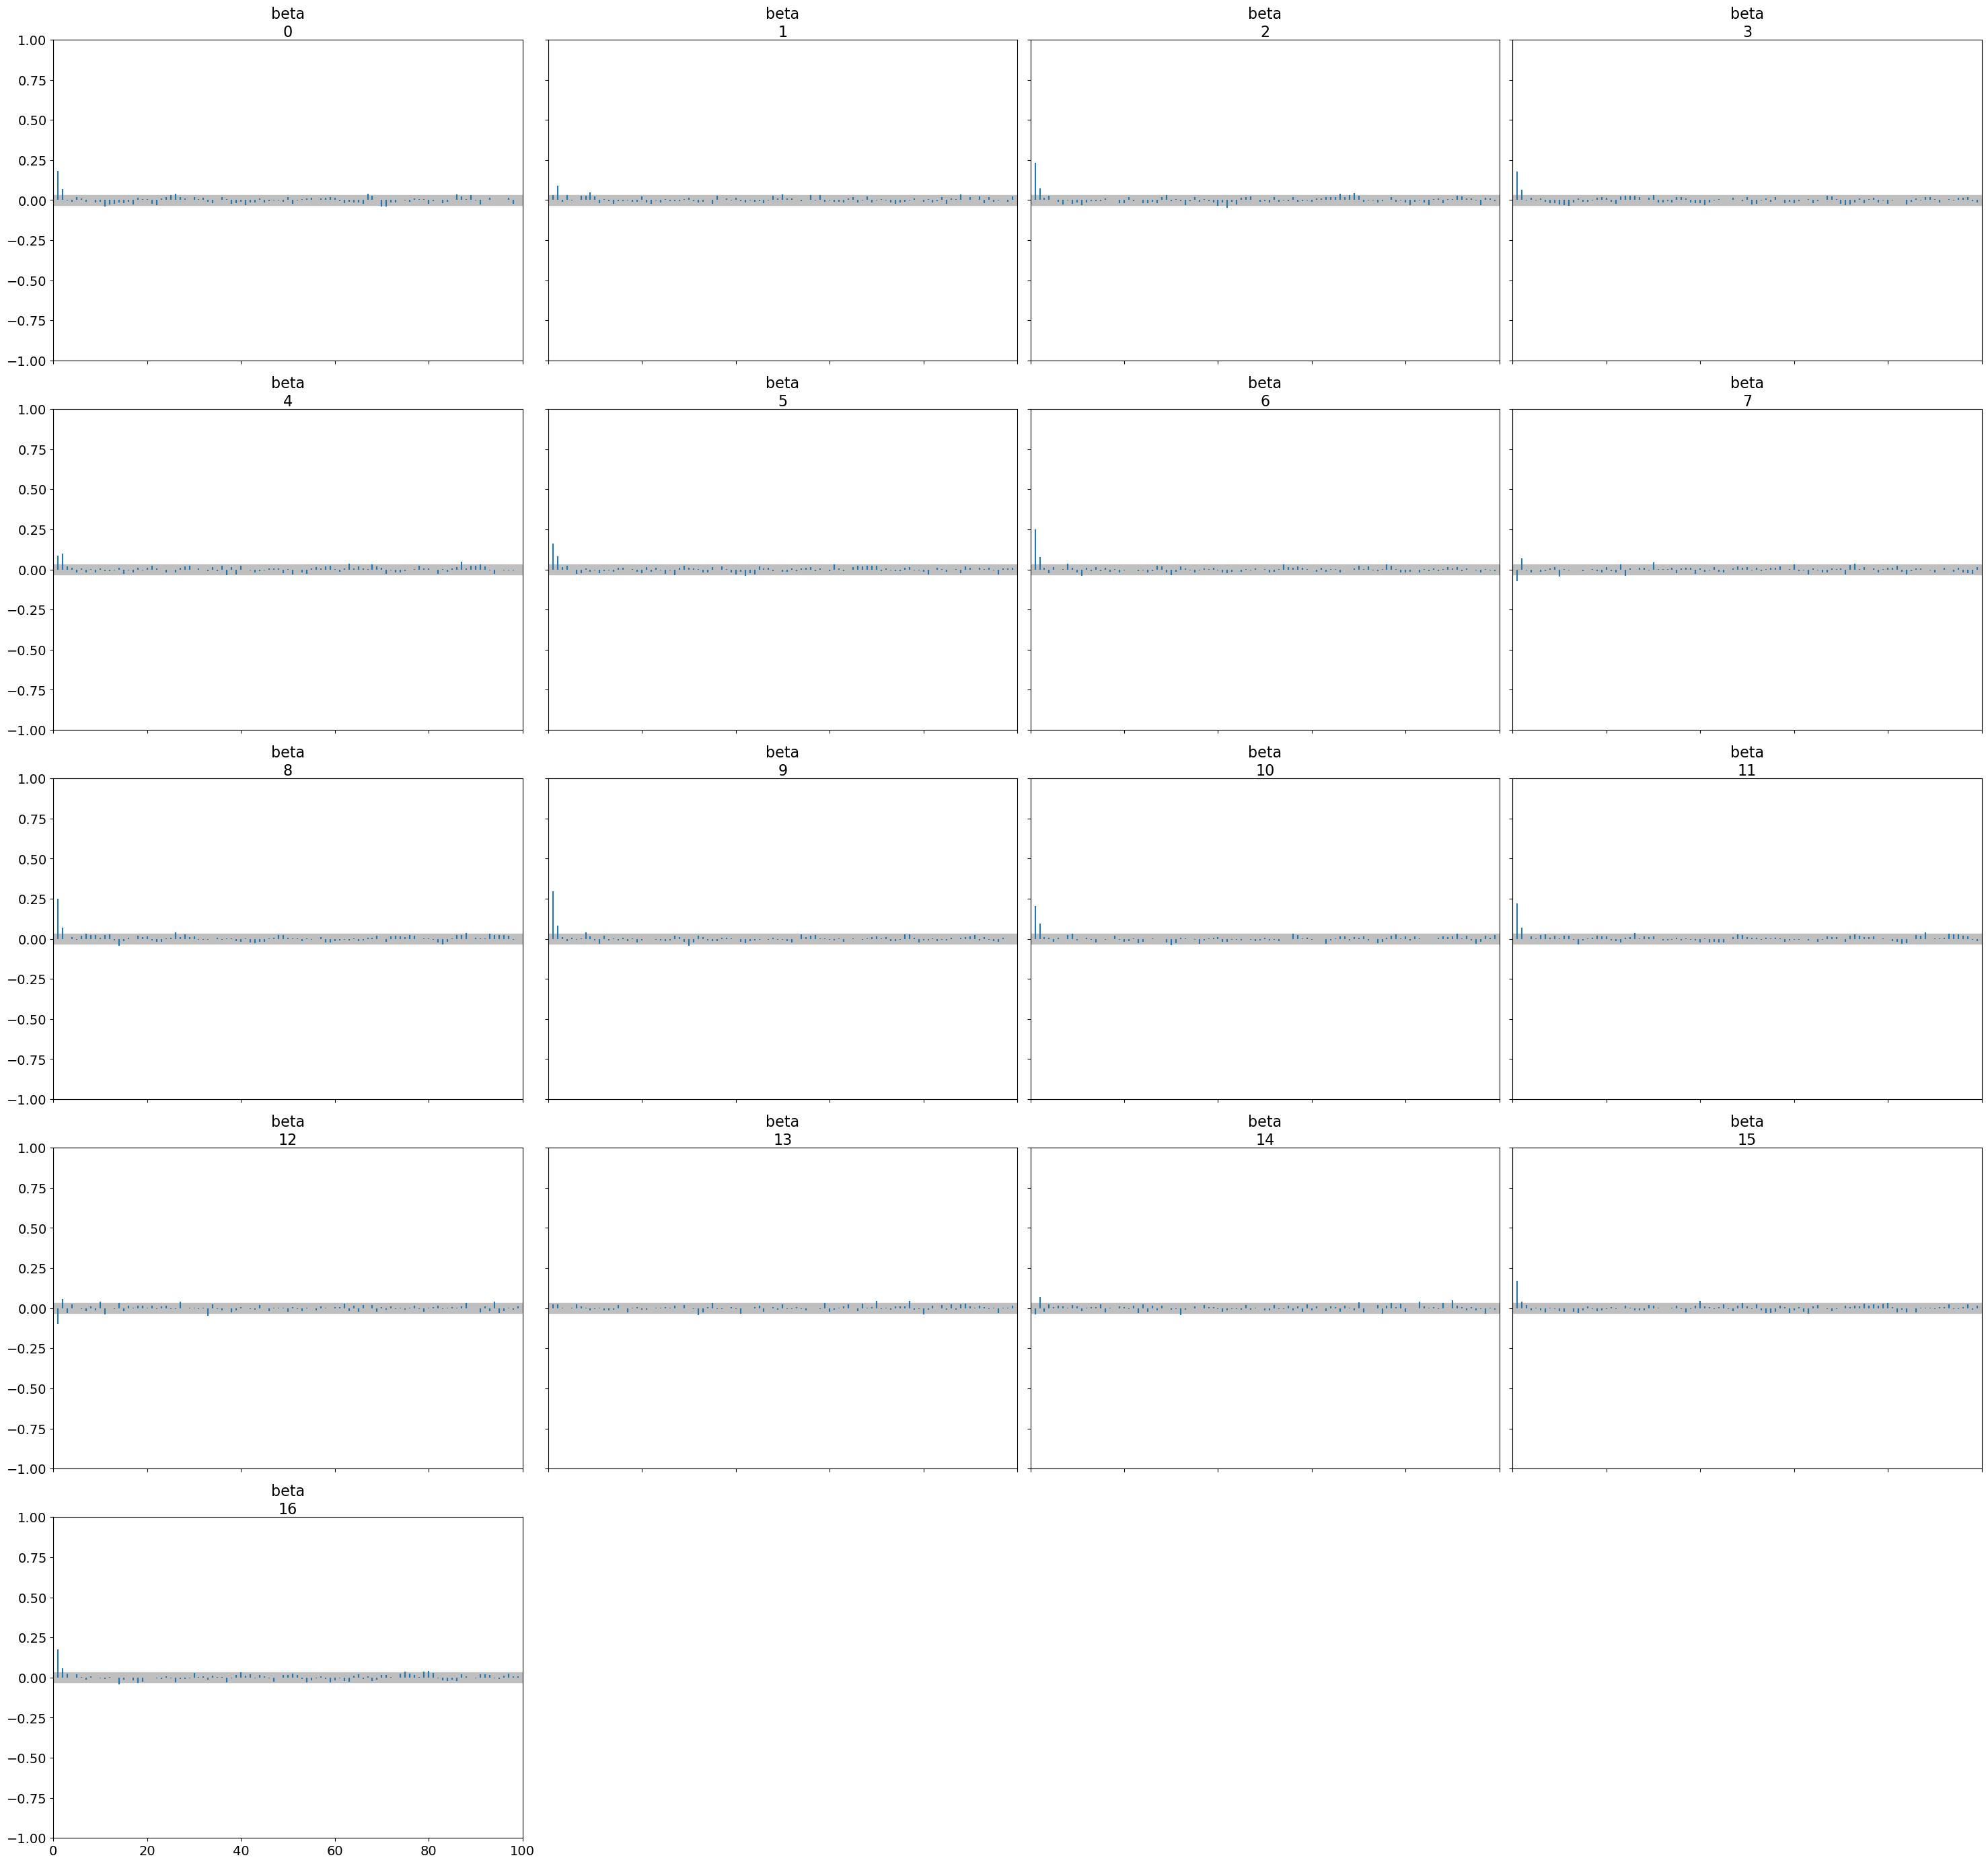

In [ ]:
az.plot_autocorr(task_sac_empathy_trace, combined=True);

##### Predictions

In [ ]:
task_sac_labels_test_class = modeler.make_labels_binary(task_sac_labels_test, task_oriented_empathy_median)
task_sac_predictions = modeler.generate_model_predictions(task_sac_empathy, task_sac_features_test, task_sac_empathy_trace)
task_sac_predictions_class = modeler.make_labels_binary(task_sac_predictions, 0.5)
accuracy_score(task_sac_labels_test_class, task_sac_predictions_class)

0.5367977145966535

#### __Combined prediction__

In [ ]:
task_fix_stimuli, task_sac_stimuli = loader.get_stimuli("test", "task")
predicted_empathy = modeler.combine_predictions(task_fix_predictions, task_fix_stimuli, task_sac_predictions, task_sac_stimuli)
real_empathy_values = [1 if task_oriented_empathy[k[1]] >= 95 else 0 for k in predicted_empathy.keys()]
predicted_empathy_values = [1 if level >= 0.5 else 0 for level in list(predicted_empathy.values())]
accuracy_score(predicted_empathy_values, real_empathy_values)

0.5617977528089888

### __Cognitive empathy__

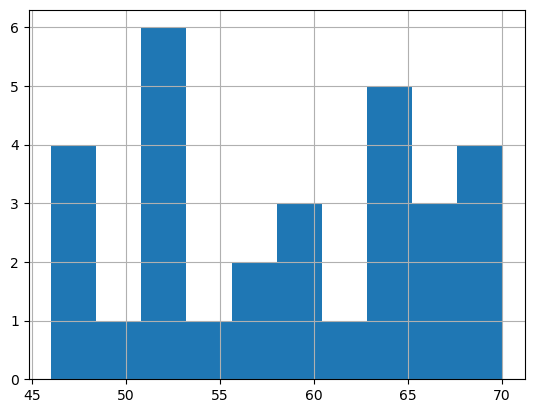

In [ ]:
task_oriented_cognitive_empathy = loader.load_eyeT_empathy_levels(experiment= "task", type="cognitive")
task_oriented_cognitive_empathy.hist();
task_oriented_cognitive_empathy_mean = task_oriented_cognitive_empathy.mean()

#### __Fixations__

In [ ]:
task_fix_cog_features_train, task_fix_cog_labels_train, task_sac_cog_features_train, task_sac_cog_labels_train =  loader.get_eyeT_features_and_labels(dset="train", type="cognitive", experiment="free")
task_fix_cog_labels_train_class = modeler.make_labels_binary(task_fix_cog_labels_train, task_oriented_cognitive_empathy_mean)
task_fix_cog_empathy, task_fix_cog_trace = modeler.generate_logistic_regression_model("task_fix_cognitive_logistic_regression", task_fix_cog_features_train, task_fix_cog_labels_train_class)

Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 461 seconds.


Saving model...


##### Sampling diagnostics

In [ ]:
az.summary(task_fix_cog_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   2.061  2.891  -3.736    7.143      0.048    0.042    3599.0   
beta[1]  -2.654  0.229  -3.083   -2.226      0.004    0.003    2833.0   
beta[2]   4.837  2.634  -0.150    9.748      0.049    0.036    2849.0   
beta[3]  -1.244  2.266  -5.666    2.914      0.038    0.033    3662.0   
beta[4]  -1.125  0.437  -1.926   -0.301      0.006    0.005    4569.0   
beta[5]  -4.111  1.784  -7.564   -0.881      0.033    0.024    2897.0   
beta[6]  -0.554  0.858  -2.140    1.034      0.019    0.013    2076.0   
beta[7]   0.161  0.117  -0.052    0.388      0.002    0.001    4421.0   
beta[8]  -2.694  0.687  -4.049   -1.495      0.016    0.011    1942.0   
beta[9]  -0.406  0.989  -2.322    1.379      0.023    0.016    1927.0   
beta[10]  2.675  0.375   1.961    3.348      0.007    0.005    3287.0   
beta[11]  1.169  0.675  -0.011    2.505      0.015    0.011    1987.0   
beta[12]  6.132  0.574   5.111    7.249      0.009    0.007    3774.0   
beta[13] -0.181  0.318  -0.742    0.446      0.006    0.004    3287.0   
beta[14]  1.167  0.358   0.495    1.844      0.006    0.005    3182.0   

          ess_tail  r_hat  
beta[0]     2588.0    1.0  
beta[1]     2768.0    1.0  
beta[2]     2573.0    1.0  
beta[3]     2480.0    1.0  
beta[4]     2589.0    1.0  
beta[5]     2720.0    1.0  
beta[6]     2324.0    1.0  
beta[7]     2978.0    1.0  
beta[8]     2593.0    1.0  
beta[9]     2042.0    1.0  
beta[10]    3152.0    1.0  
beta[11]    2645.0    1.0  
beta[12]    2986.0    1.0  
beta[13]    2772.0    1.0  
beta[14]    2713.0    1.0

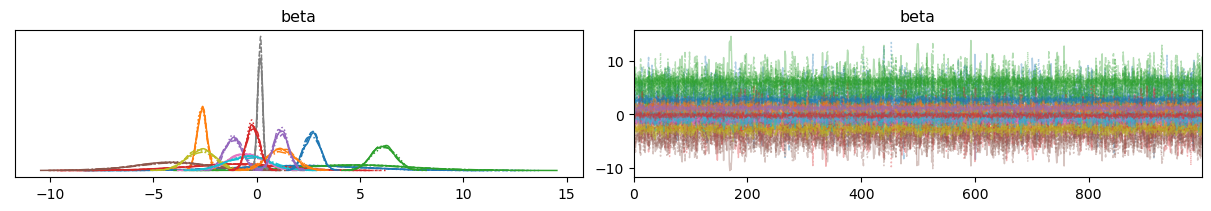

In [ ]:
az.plot_trace(task_fix_cog_trace);

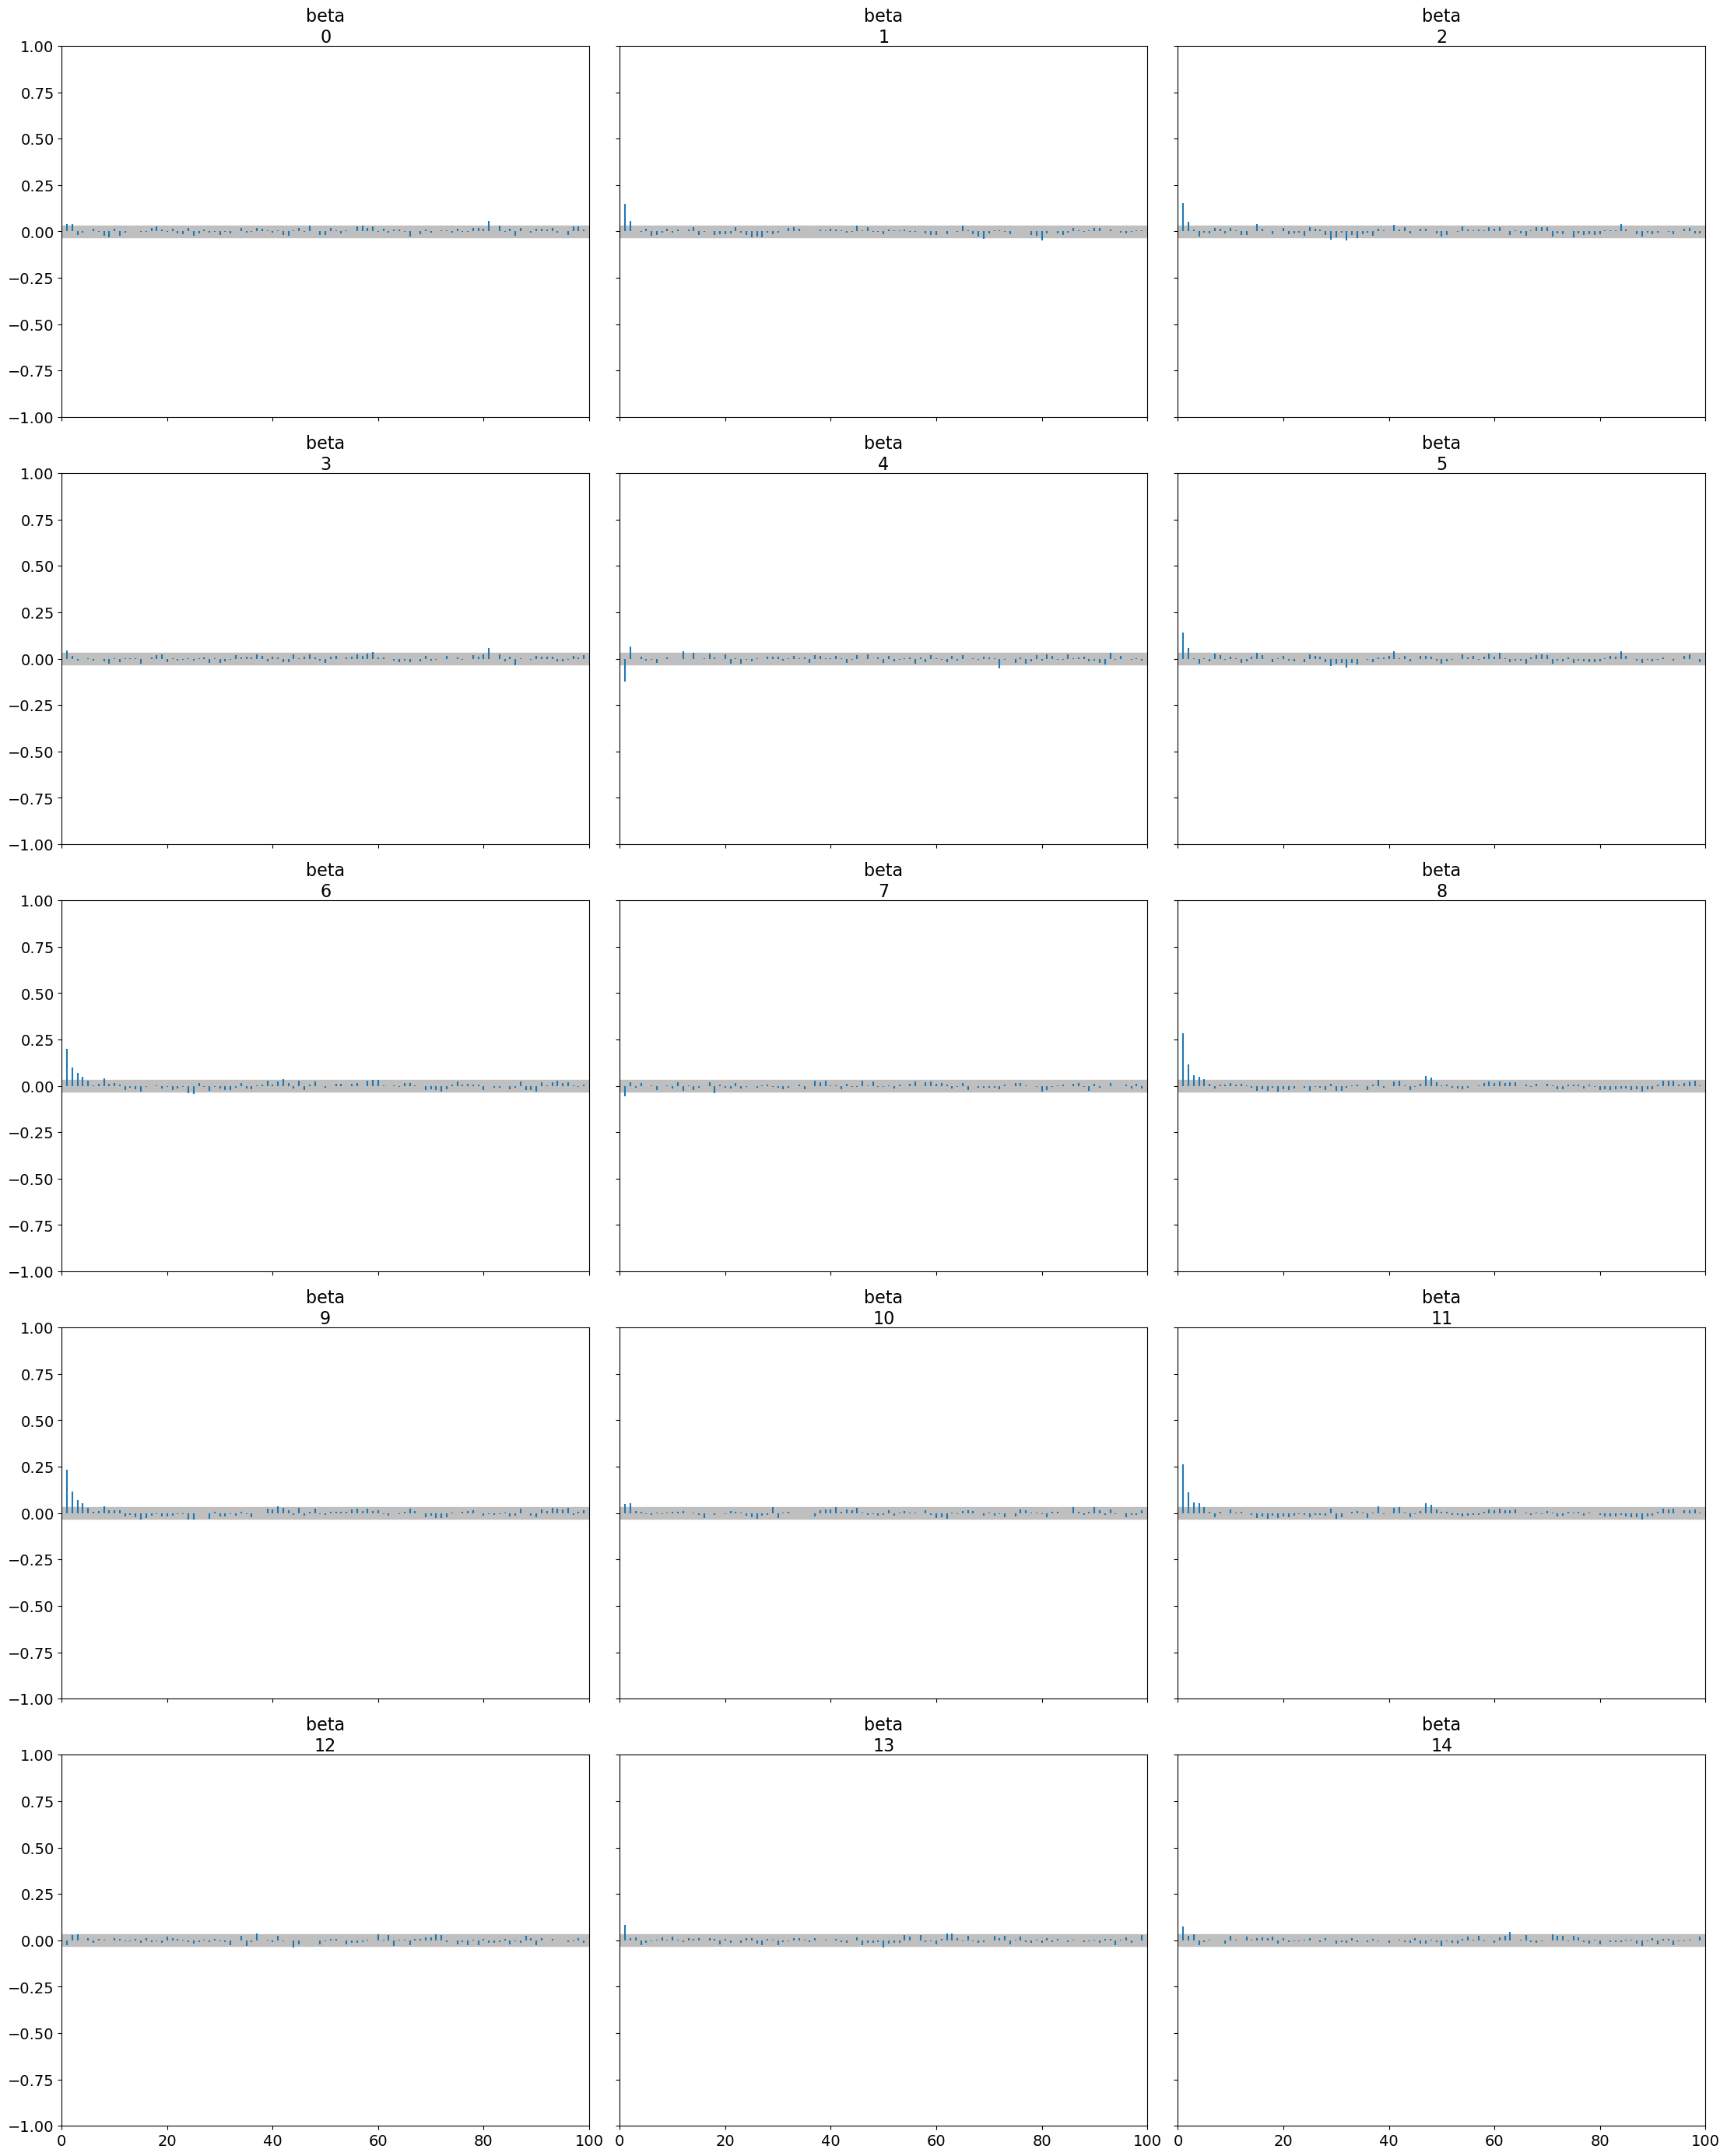

In [ ]:
az.plot_autocorr(task_fix_cog_trace, combined=True);

##### Predictions

In [ ]:
task_fix_cog_features_test, task_fix_cog_labels_test, task_sac_cog_features_test, task_sac_cog_labels_test =  loader.get_eyeT_features_and_labels(dset="test", type="cognitive", experiment="task")
task_fix_cog_labels_test_class = modeler.make_labels_binary(task_fix_cog_labels_test, task_oriented_cognitive_empathy_mean)
task_fix_cog_predictions = modeler.generate_model_predictions(task_fix_cog_empathy, task_fix_cog_features_test, task_fix_cog_trace)
task_fix_cog_predictions_class = modeler.make_labels_binary(task_fix_cog_predictions, 0.5)
accuracy_score(task_fix_cog_labels_test_class, task_fix_cog_predictions_class)

0.49695302809685593

#### __Saccades__

In [ ]:
task_sac_cog_labels_train_class = modeler.make_labels_binary(task_sac_cog_labels_train, task_oriented_cognitive_empathy_mean)
task_sac_cog_empathy, task_sac_cog_trace = modeler.generate_logistic_regression_model("task_sac_cognitive_logistic_regression", task_sac_cog_features_train, task_sac_cog_labels_train_class)

Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 348 seconds.


Saving model...


##### Sampling diagnostics

In [ ]:
az.summary(task_sac_cog_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  -0.062  0.633  -1.166    1.247      0.011    0.010    3102.0   
beta[1]  -1.062  0.185  -1.430   -0.735      0.003    0.002    3278.0   
beta[2]  -0.453  1.365  -3.053    2.061      0.026    0.020    2712.0   
beta[3]   0.856  1.085  -1.186    2.923      0.019    0.016    3388.0   
beta[4]  -1.269  0.992  -3.178    0.541      0.017    0.012    3264.0   
beta[5]   0.306  1.015  -1.581    2.201      0.019    0.014    2884.0   
beta[6]  -0.410  0.487  -1.294    0.539      0.011    0.008    1864.0   
beta[7]   0.043  0.087  -0.112    0.212      0.001    0.001    4216.0   
beta[8]   0.905  0.459   0.117    1.824      0.009    0.006    2735.0   
beta[9]  -0.212  0.648  -1.444    0.971      0.017    0.012    1542.0   
beta[10]  0.838  0.339   0.212    1.498      0.008    0.005    1928.0   
beta[11] -1.345  0.478  -2.224   -0.436      0.009    0.006    2931.0   
beta[12]  0.155  0.094  -0.015    0.335      0.002    0.001    3910.0   
beta[13] -1.266  0.299  -1.855   -0.715      0.005    0.004    3491.0   
beta[14]  1.031  0.314   0.432    1.600      0.005    0.003    4685.0   
beta[15]  0.185  0.383  -0.548    0.872      0.007    0.005    3128.0   
beta[16]  1.427  0.408   0.690    2.210      0.007    0.005    3156.0   

          ess_tail  r_hat  
beta[0]     2696.0    1.0  
beta[1]     3304.0    1.0  
beta[2]     2871.0    1.0  
beta[3]     2595.0    1.0  
beta[4]     3166.0    1.0  
beta[5]     3147.0    1.0  
beta[6]     2311.0    1.0  
beta[7]     3113.0    1.0  
beta[8]     2751.0    1.0  
beta[9]     2086.0    1.0  
beta[10]    2462.0    1.0  
beta[11]    2854.0    1.0  
beta[12]    3166.0    1.0  
beta[13]    3061.0    1.0  
beta[14]    2997.0    1.0  
beta[15]    3080.0    1.0  
beta[16]    2722.0    1.0

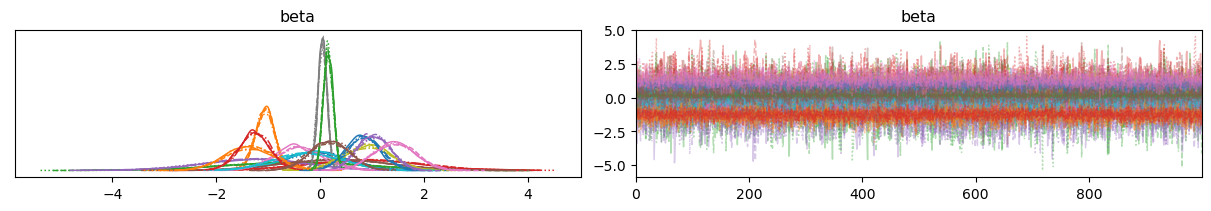

In [ ]:
az.plot_trace(task_sac_cog_trace);

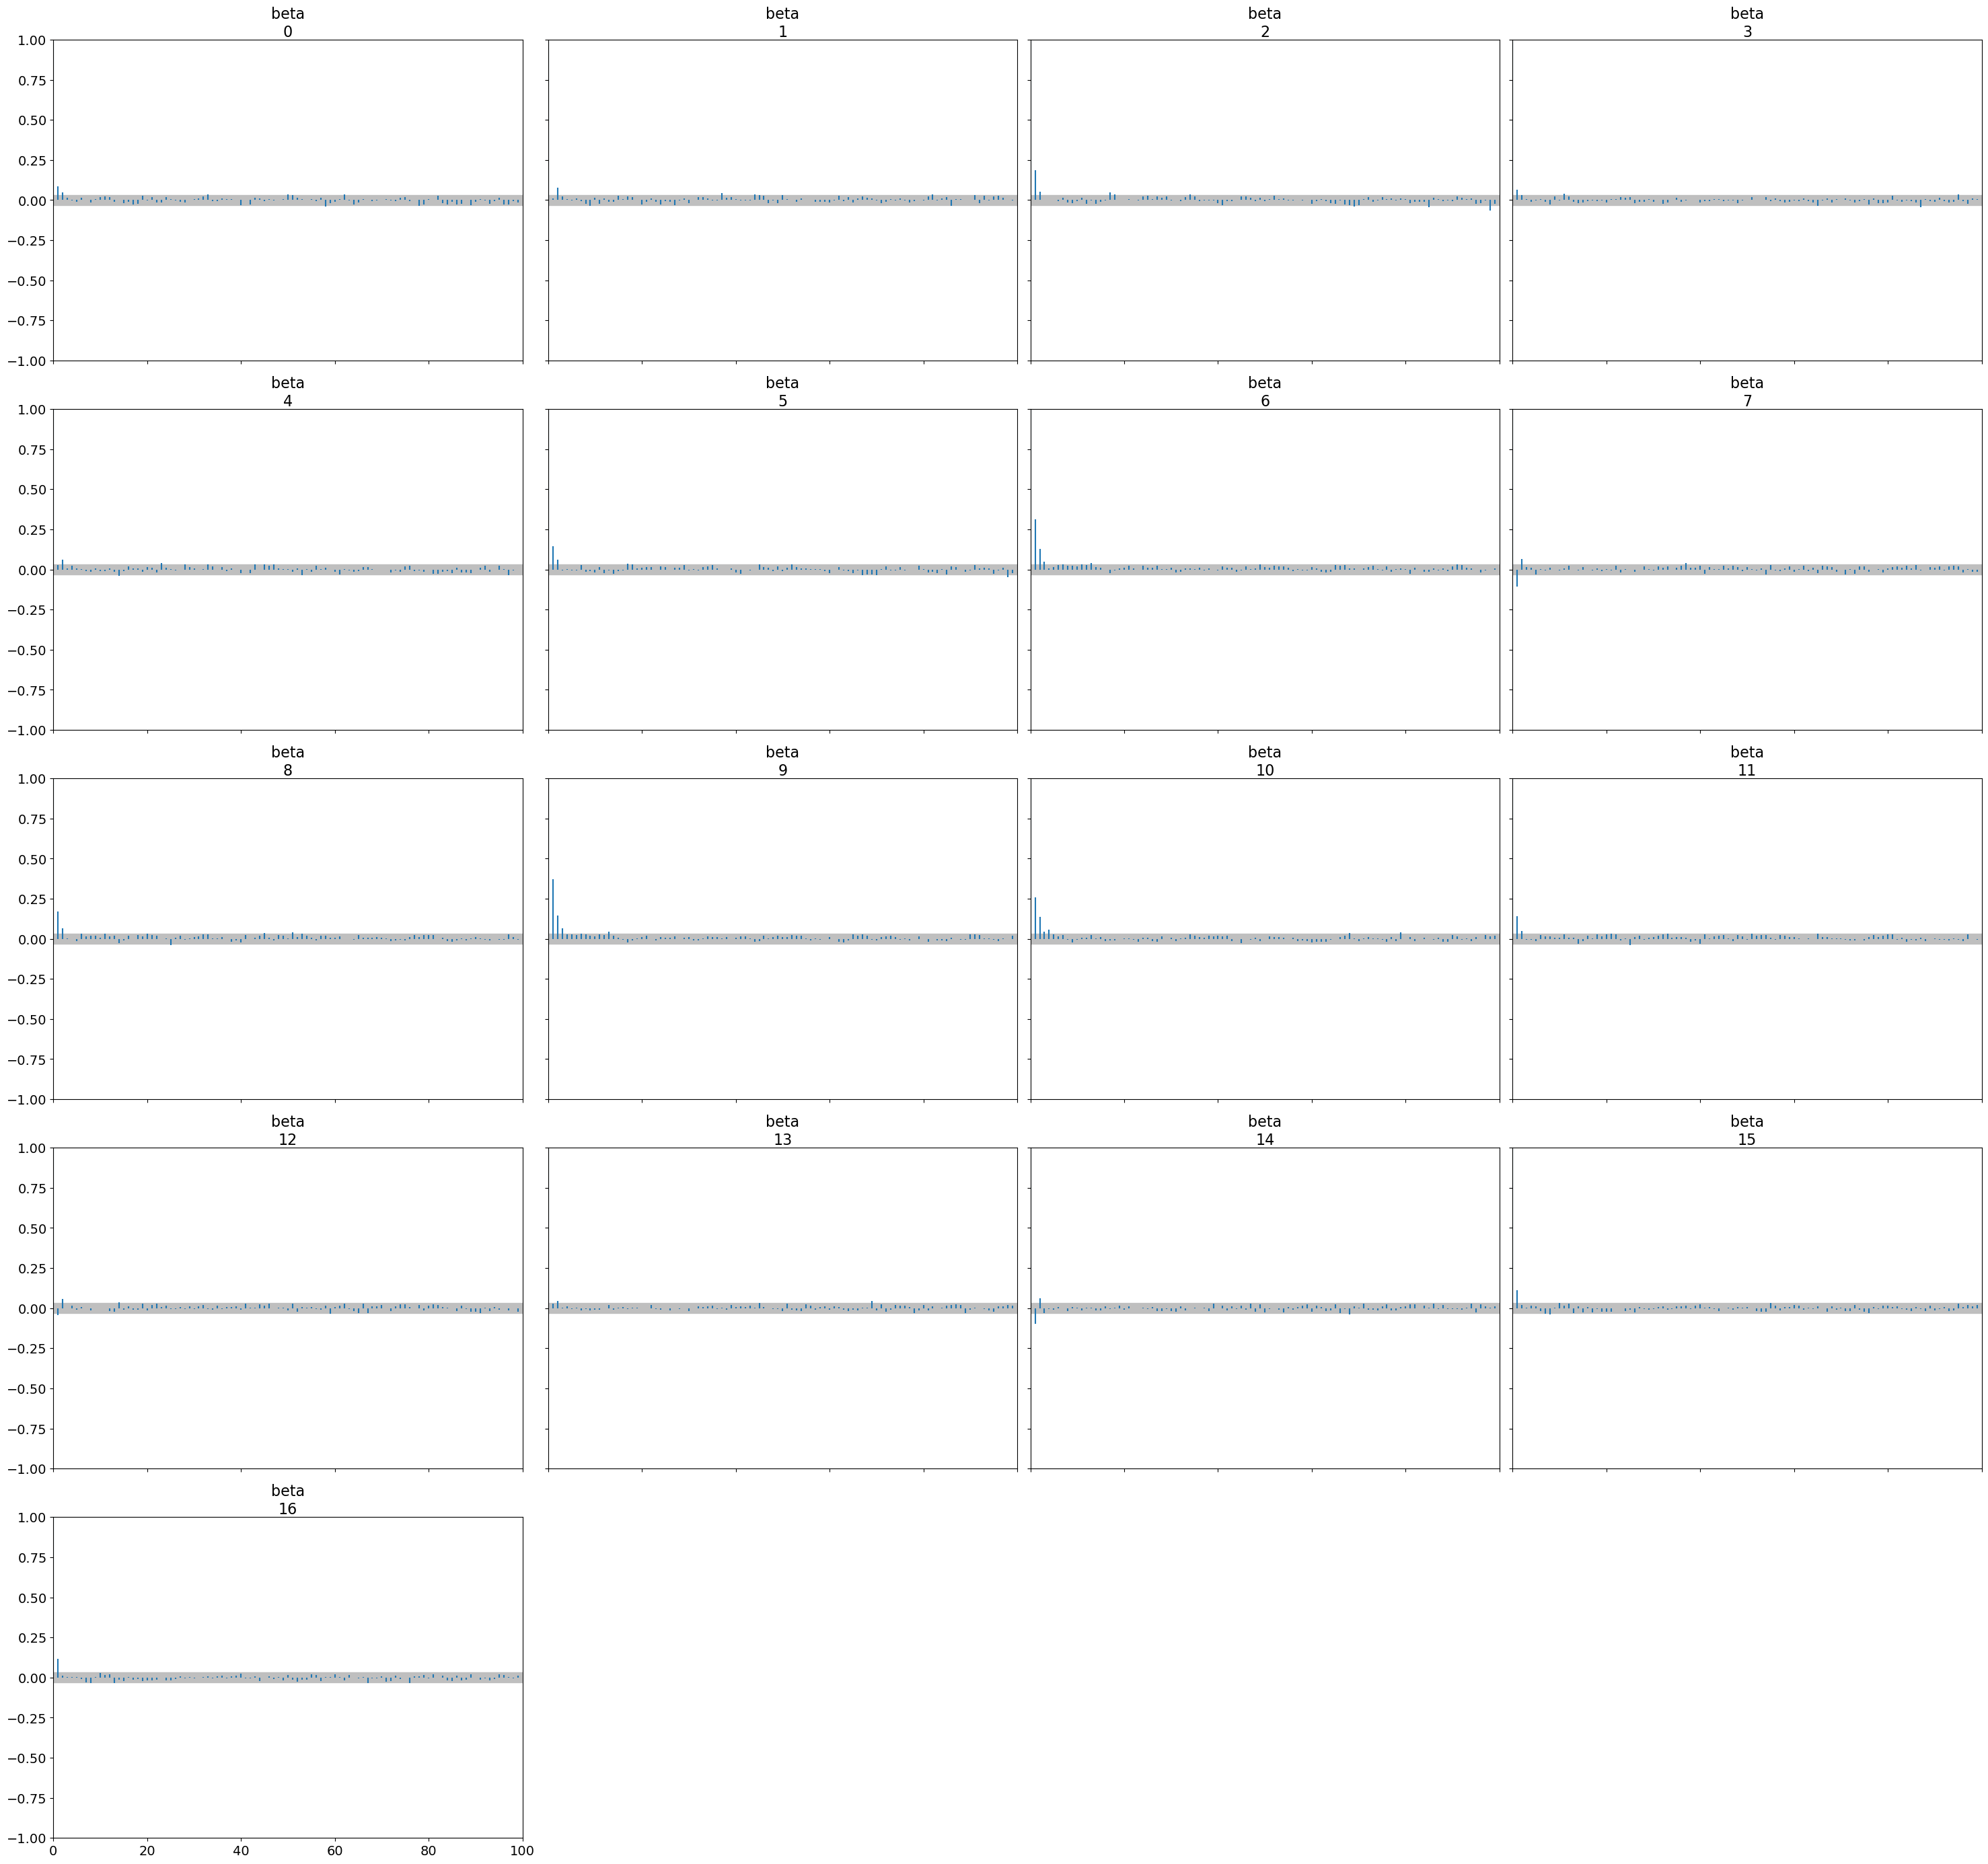

In [ ]:
az.plot_autocorr(task_sac_cog_trace, combined=True);

##### Predictions

In [ ]:
task_sac_cog_labels_test_class = modeler.make_labels_binary(task_sac_cog_labels_test, task_oriented_cognitive_empathy_mean)
task_sac_cog_predictions = modeler.generate_model_predictions(task_sac_cog_empathy, task_sac_cog_features_test, task_sac_cog_trace)
task_sac_cog_predictions_class = modeler.make_labels_binary(task_sac_cog_predictions, 0.5)
accuracy_score(task_sac_cog_labels_test_class, task_sac_cog_predictions_class)

0.5214936743300231

#### __Combined predictions__

In [ ]:
task_fix_stimuli, task_sac_stimuli = loader.get_stimuli("test", "task")
predicted_cog_empathy = modeler.combine_predictions(task_fix_cog_predictions, task_fix_stimuli, task_sac_cog_predictions, task_sac_stimuli)
real_empathy_cog_values = [1 if task_oriented_cognitive_empathy[k[1]] >= task_oriented_cognitive_empathy_mean else 0 for k in predicted_cog_empathy.keys()]
predicted_empathy_cog_values = [1 if level >= 0.5 else 0 for level in list(predicted_cog_empathy.values())]
accuracy_score(predicted_empathy_cog_values, real_empathy_cog_values)

0.43820224719101125

### __Affective empathy__

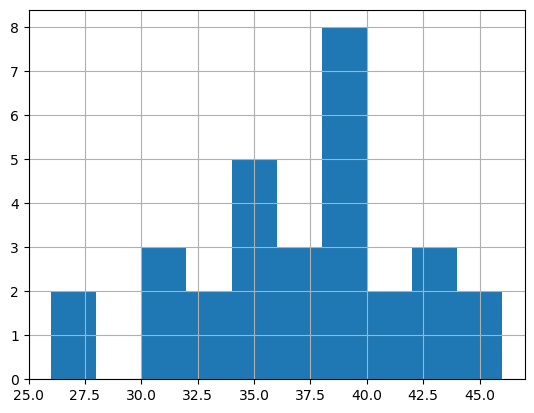

In [18]:
task_oriented_affective_empathy = loader.load_eyeT_empathy_levels(experiment= "task", type="affective")
task_oriented_affective_empathy.hist();
task_oriented_affective_empathy_median = task_oriented_affective_empathy.median()

#### __Fixatios__

In [6]:
task_fix_aff_features_train, task_fix_aff_labels_train, task_sac_aff_features_train, task_sac_aff_labels_train =  loader.get_eyeT_features_and_labels(dset="train", type="affective", experiment="task")
task_fix_aff_labels_train_class = modeler.make_labels_binary(task_fix_aff_labels_train, task_oriented_affective_empathy_median)
task_fix_aff_empathy, task_fix_aff_trace = modeler.generate_logistic_regression_model("task_fix_affective_logistic_regression", task_fix_aff_features_train, task_fix_aff_labels_train_class)

#### Sampling diagnostics

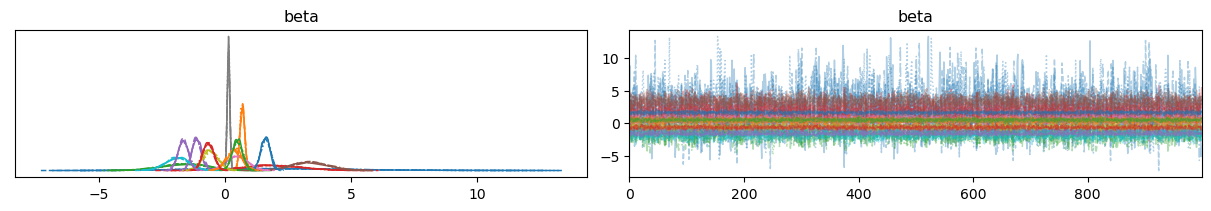

In [ ]:
az.plot_trace(task_fix_aff_trace);

In [ ]:
az.summary(task_fix_aff_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   1.974  3.112  -3.847    7.754      0.056    0.047    3205.0   
beta[1]   0.689  0.095   0.517    0.871      0.002    0.001    2818.0   
beta[2]  -1.599  0.924  -3.295    0.214      0.019    0.013    2463.0   
beta[3]   1.808  1.203  -0.533    4.030      0.022    0.016    3058.0   
beta[4]  -1.124  0.192  -1.507   -0.770      0.003    0.002    5027.0   
beta[5]   3.382  0.725   2.027    4.716      0.014    0.010    2505.0   
beta[6]   0.479  0.420  -0.270    1.282      0.009    0.006    2324.0   
beta[7]   0.145  0.049   0.052    0.237      0.001    0.001    4844.0   
beta[8]  -0.579  0.308  -1.147   -0.003      0.006    0.005    2314.0   
beta[9]  -1.881  0.472  -2.800   -1.029      0.010    0.007    2126.0   
beta[10]  1.615  0.182   1.237    1.913      0.003    0.002    2791.0   
beta[11]  0.368  0.298  -0.207    0.903      0.006    0.004    2330.0   
beta[12]  0.499  0.199   0.147    0.894      0.003    0.002    4014.0   
beta[13] -0.661  0.215  -1.048   -0.255      0.004    0.003    3657.0   
beta[14] -1.649  0.197  -2.021   -1.287      0.003    0.002    3657.0   

          ess_tail  r_hat  
beta[0]     2668.0    1.0  
beta[1]     2826.0    1.0  
beta[2]     2500.0    1.0  
beta[3]     2509.0    1.0  
beta[4]     2799.0    1.0  
beta[5]     2512.0    1.0  
beta[6]     2426.0    1.0  
beta[7]     3077.0    1.0  
beta[8]     2936.0    1.0  
beta[9]     2399.0    1.0  
beta[10]    2723.0    1.0  
beta[11]    2622.0    1.0  
beta[12]    3159.0    1.0  
beta[13]    2962.0    1.0  
beta[14]    2855.0    1.0

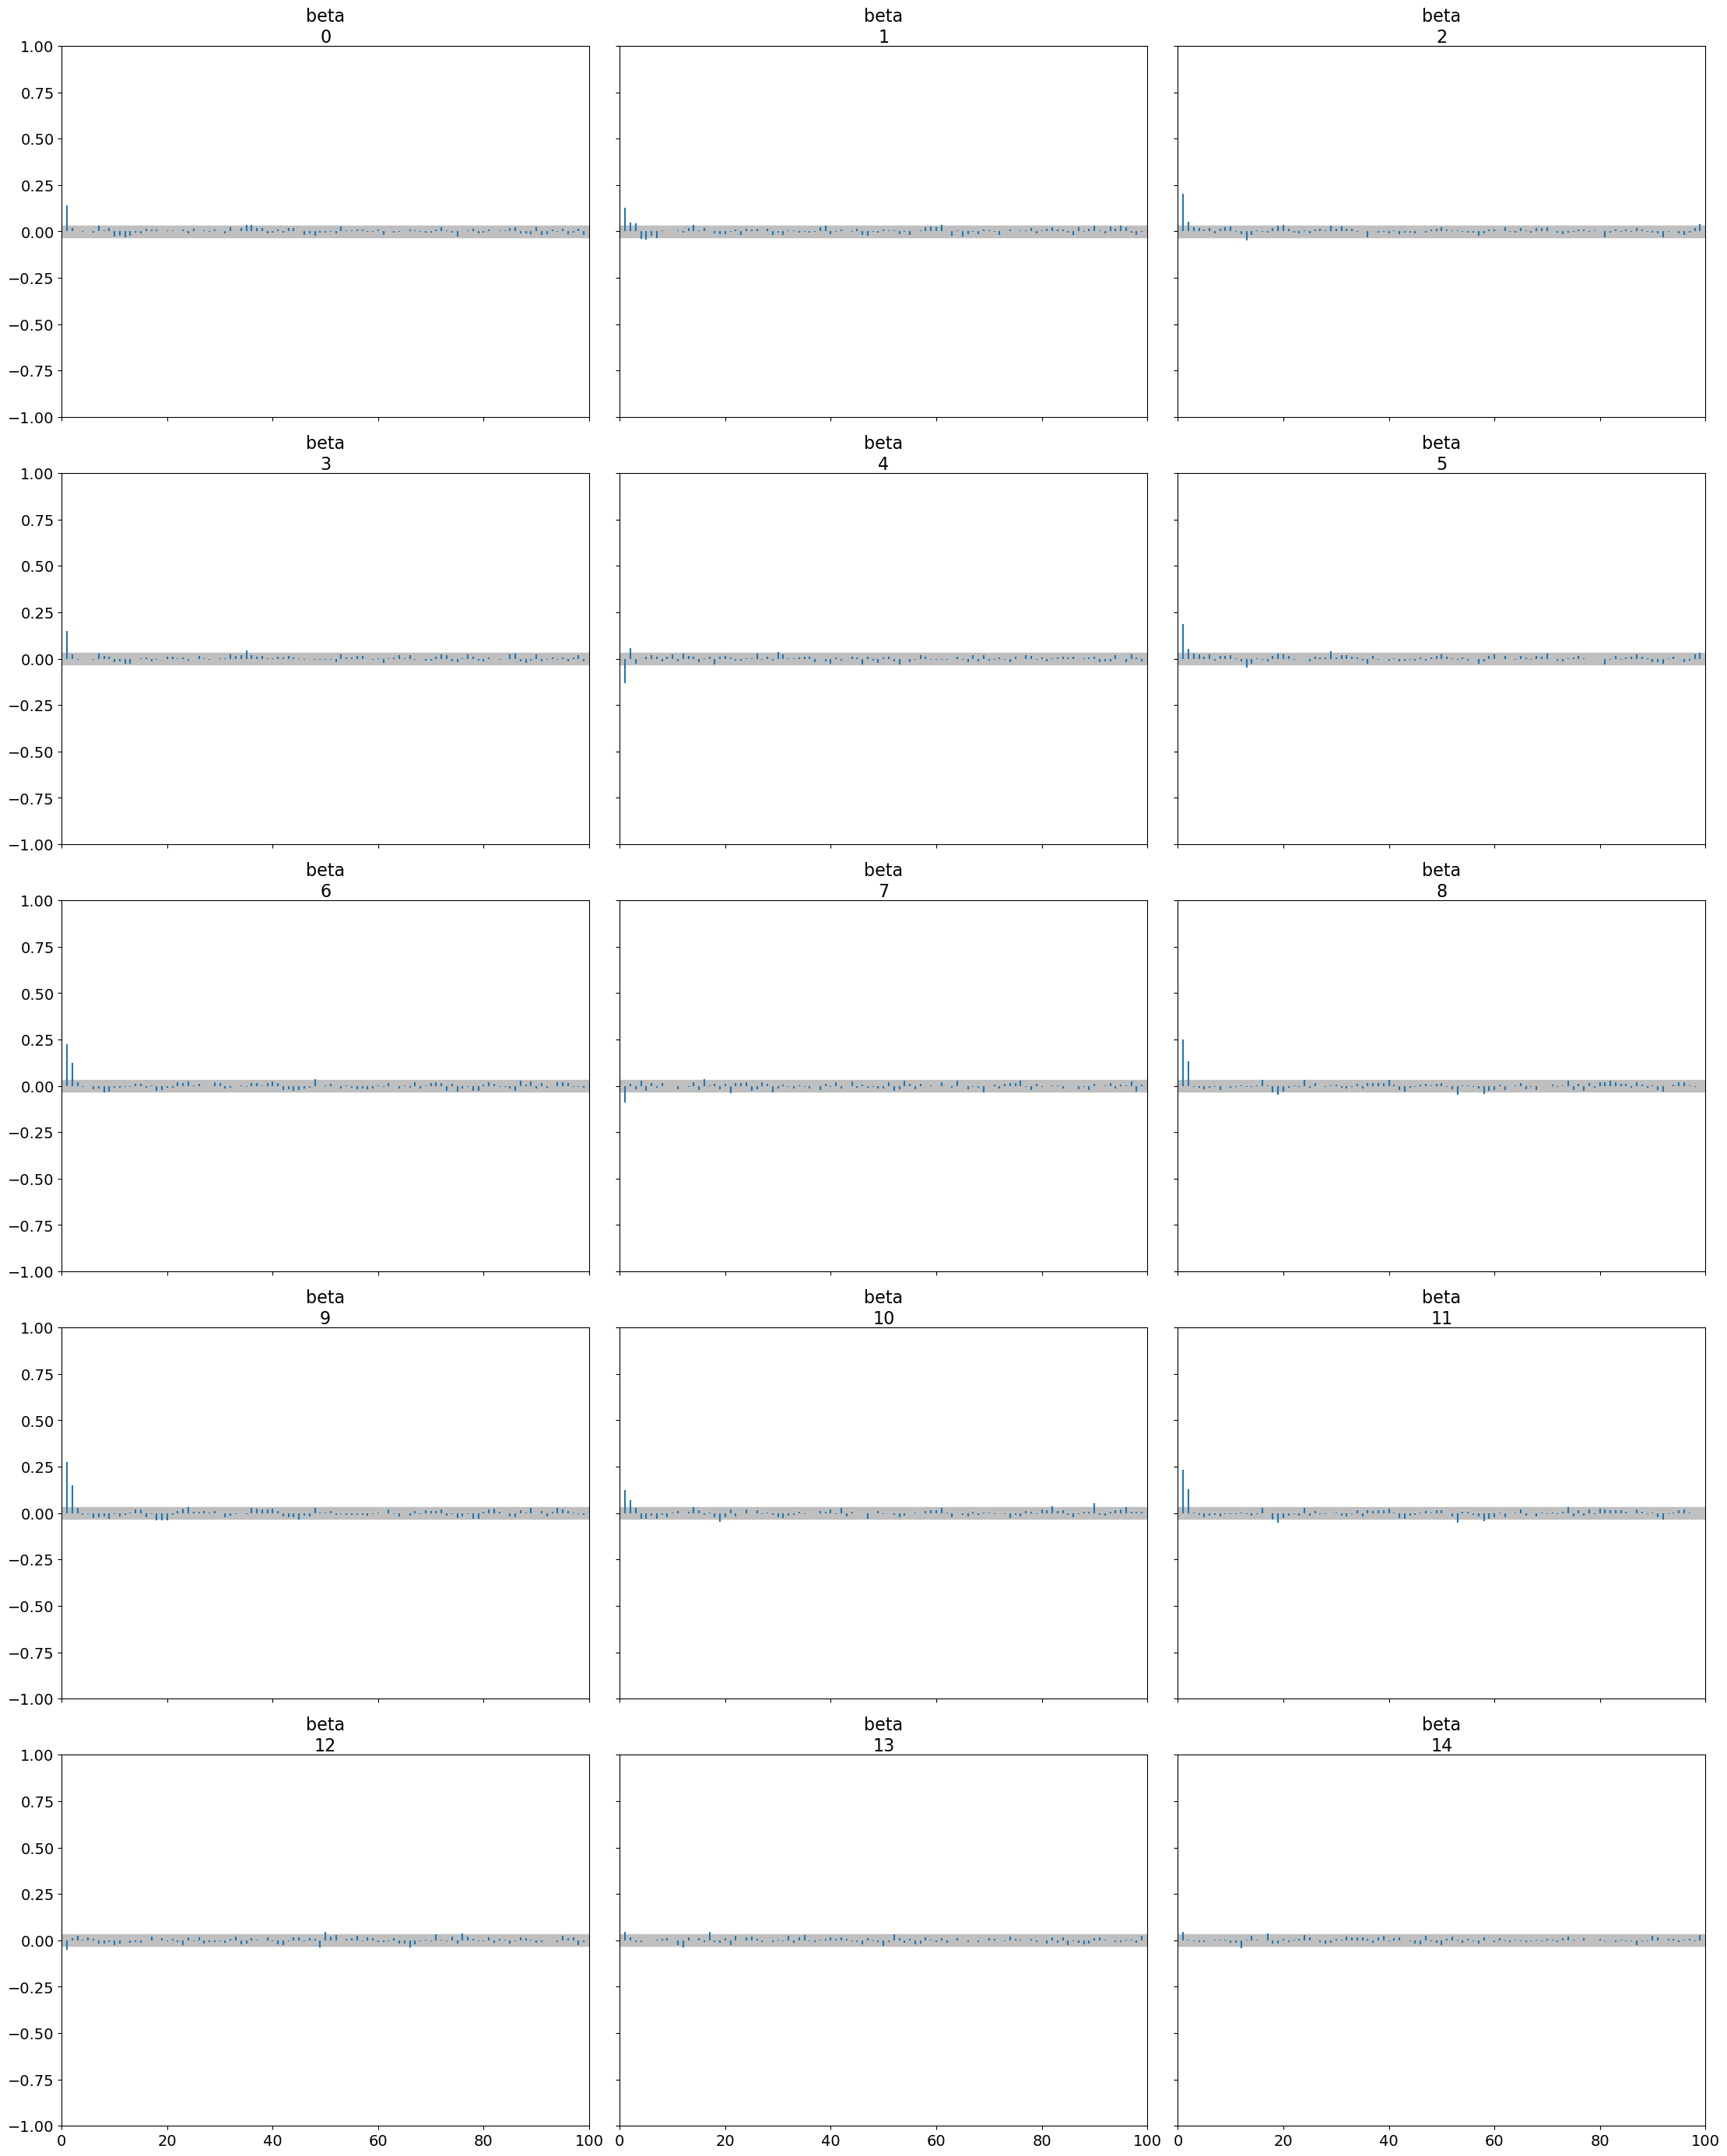

In [ ]:
az.plot_autocorr(task_fix_aff_trace, combined=True);

#### Predictions

In [15]:
task_fix_aff_features_test, task_fix_aff_labels_test, task_sac_aff_features_test, task_sac_aff_labels_test =  loader.get_eyeT_features_and_labels(dset="test", type="cognitive", experiment="task")
task_fix_aff_labels_test_class = modeler.make_labels_binary(task_fix_aff_labels_test, task_oriented_affective_empathy_median)
task_fix_aff_predictions = modeler.generate_model_predictions(task_fix_aff_empathy, task_fix_aff_features_test, task_fix_aff_trace)
task_fix_aff_predictions_class = modeler.make_labels_binary(task_fix_aff_predictions, 0.5)
accuracy_score(task_fix_aff_labels_test_class, task_fix_aff_predictions_class)

0.6396483848352478

#### __Saccades__

In [7]:
task_sac_aff_labels_train_class = modeler.make_labels_binary(task_sac_aff_labels_train, task_oriented_affective_empathy_median)
task_sac_aff_empathy, task_sac_aff_trace = modeler.generate_logistic_regression_model("task_sac_affective_logistic_regression", task_sac_aff_features_train, task_sac_aff_labels_train_class, cores=2)

#### Sampling diagnostics

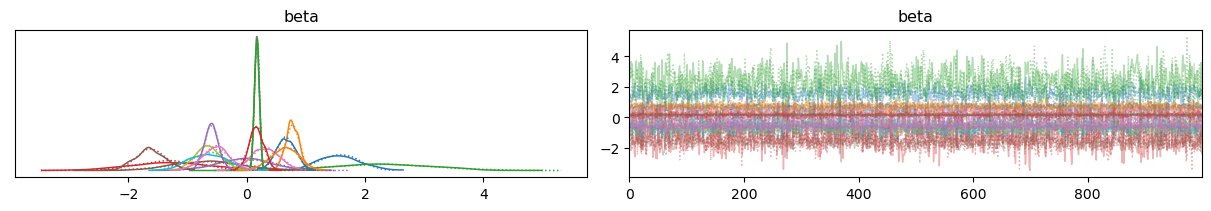

In [8]:
az.plot_trace(task_sac_aff_trace);

In [9]:
az.summary(task_sac_aff_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   1.560  0.343   0.934    2.206      0.009    0.006    1448.0   
beta[1]   0.771  0.115   0.557    0.982      0.003    0.002    1582.0   
beta[2]   2.309  0.857   0.793    3.961      0.024    0.018    1230.0   
beta[3]  -1.315  0.632  -2.571   -0.199      0.016    0.012    1526.0   
beta[4]  -0.035  0.462  -0.941    0.775      0.013    0.010    1327.0   
beta[5]  -0.655  0.609  -1.877    0.395      0.016    0.014    1374.0   
beta[6]   0.316  0.235  -0.112    0.763      0.006    0.005    1316.0   
beta[7]   0.171  0.040   0.092    0.243      0.001    0.001    2105.0   
beta[8]  -0.646  0.214  -1.088   -0.277      0.006    0.004    1212.0   
beta[9]  -0.667  0.318  -1.244   -0.075      0.009    0.007    1221.0   
beta[10]  0.660  0.165   0.364    0.979      0.005    0.003    1188.0   
beta[11]  0.641  0.227   0.217    1.067      0.006    0.004    1303.0   
beta[12]  0.173  0.041   0.100    0.250      0.001    0.001    2006.0   
beta[13]  0.161  0.125  -0.064    0.400      0.003    0.002    1642.0   
beta[14] -0.598  0.119  -0.830   -0.380      0.003    0.002    2169.0   
beta[15] -1.626  0.255  -2.088   -1.147      0.007    0.005    1176.0   
beta[16] -0.528  0.227  -0.959   -0.102      0.007    0.005    1214.0   

          ess_tail  r_hat  
beta[0]     1547.0   1.00  
beta[1]     1231.0   1.00  
beta[2]     1108.0   1.00  
beta[3]     1388.0   1.01  
beta[4]     1394.0   1.00  
beta[5]     1087.0   1.00  
beta[6]     1459.0   1.00  
beta[7]     1393.0   1.00  
beta[8]     1402.0   1.00  
beta[9]     1356.0   1.00  
beta[10]    1262.0   1.00  
beta[11]    1550.0   1.00  
beta[12]    1461.0   1.00  
beta[13]    1101.0   1.00  
beta[14]    1537.0   1.00  
beta[15]    1336.0   1.00  
beta[16]    1338.0   1.00

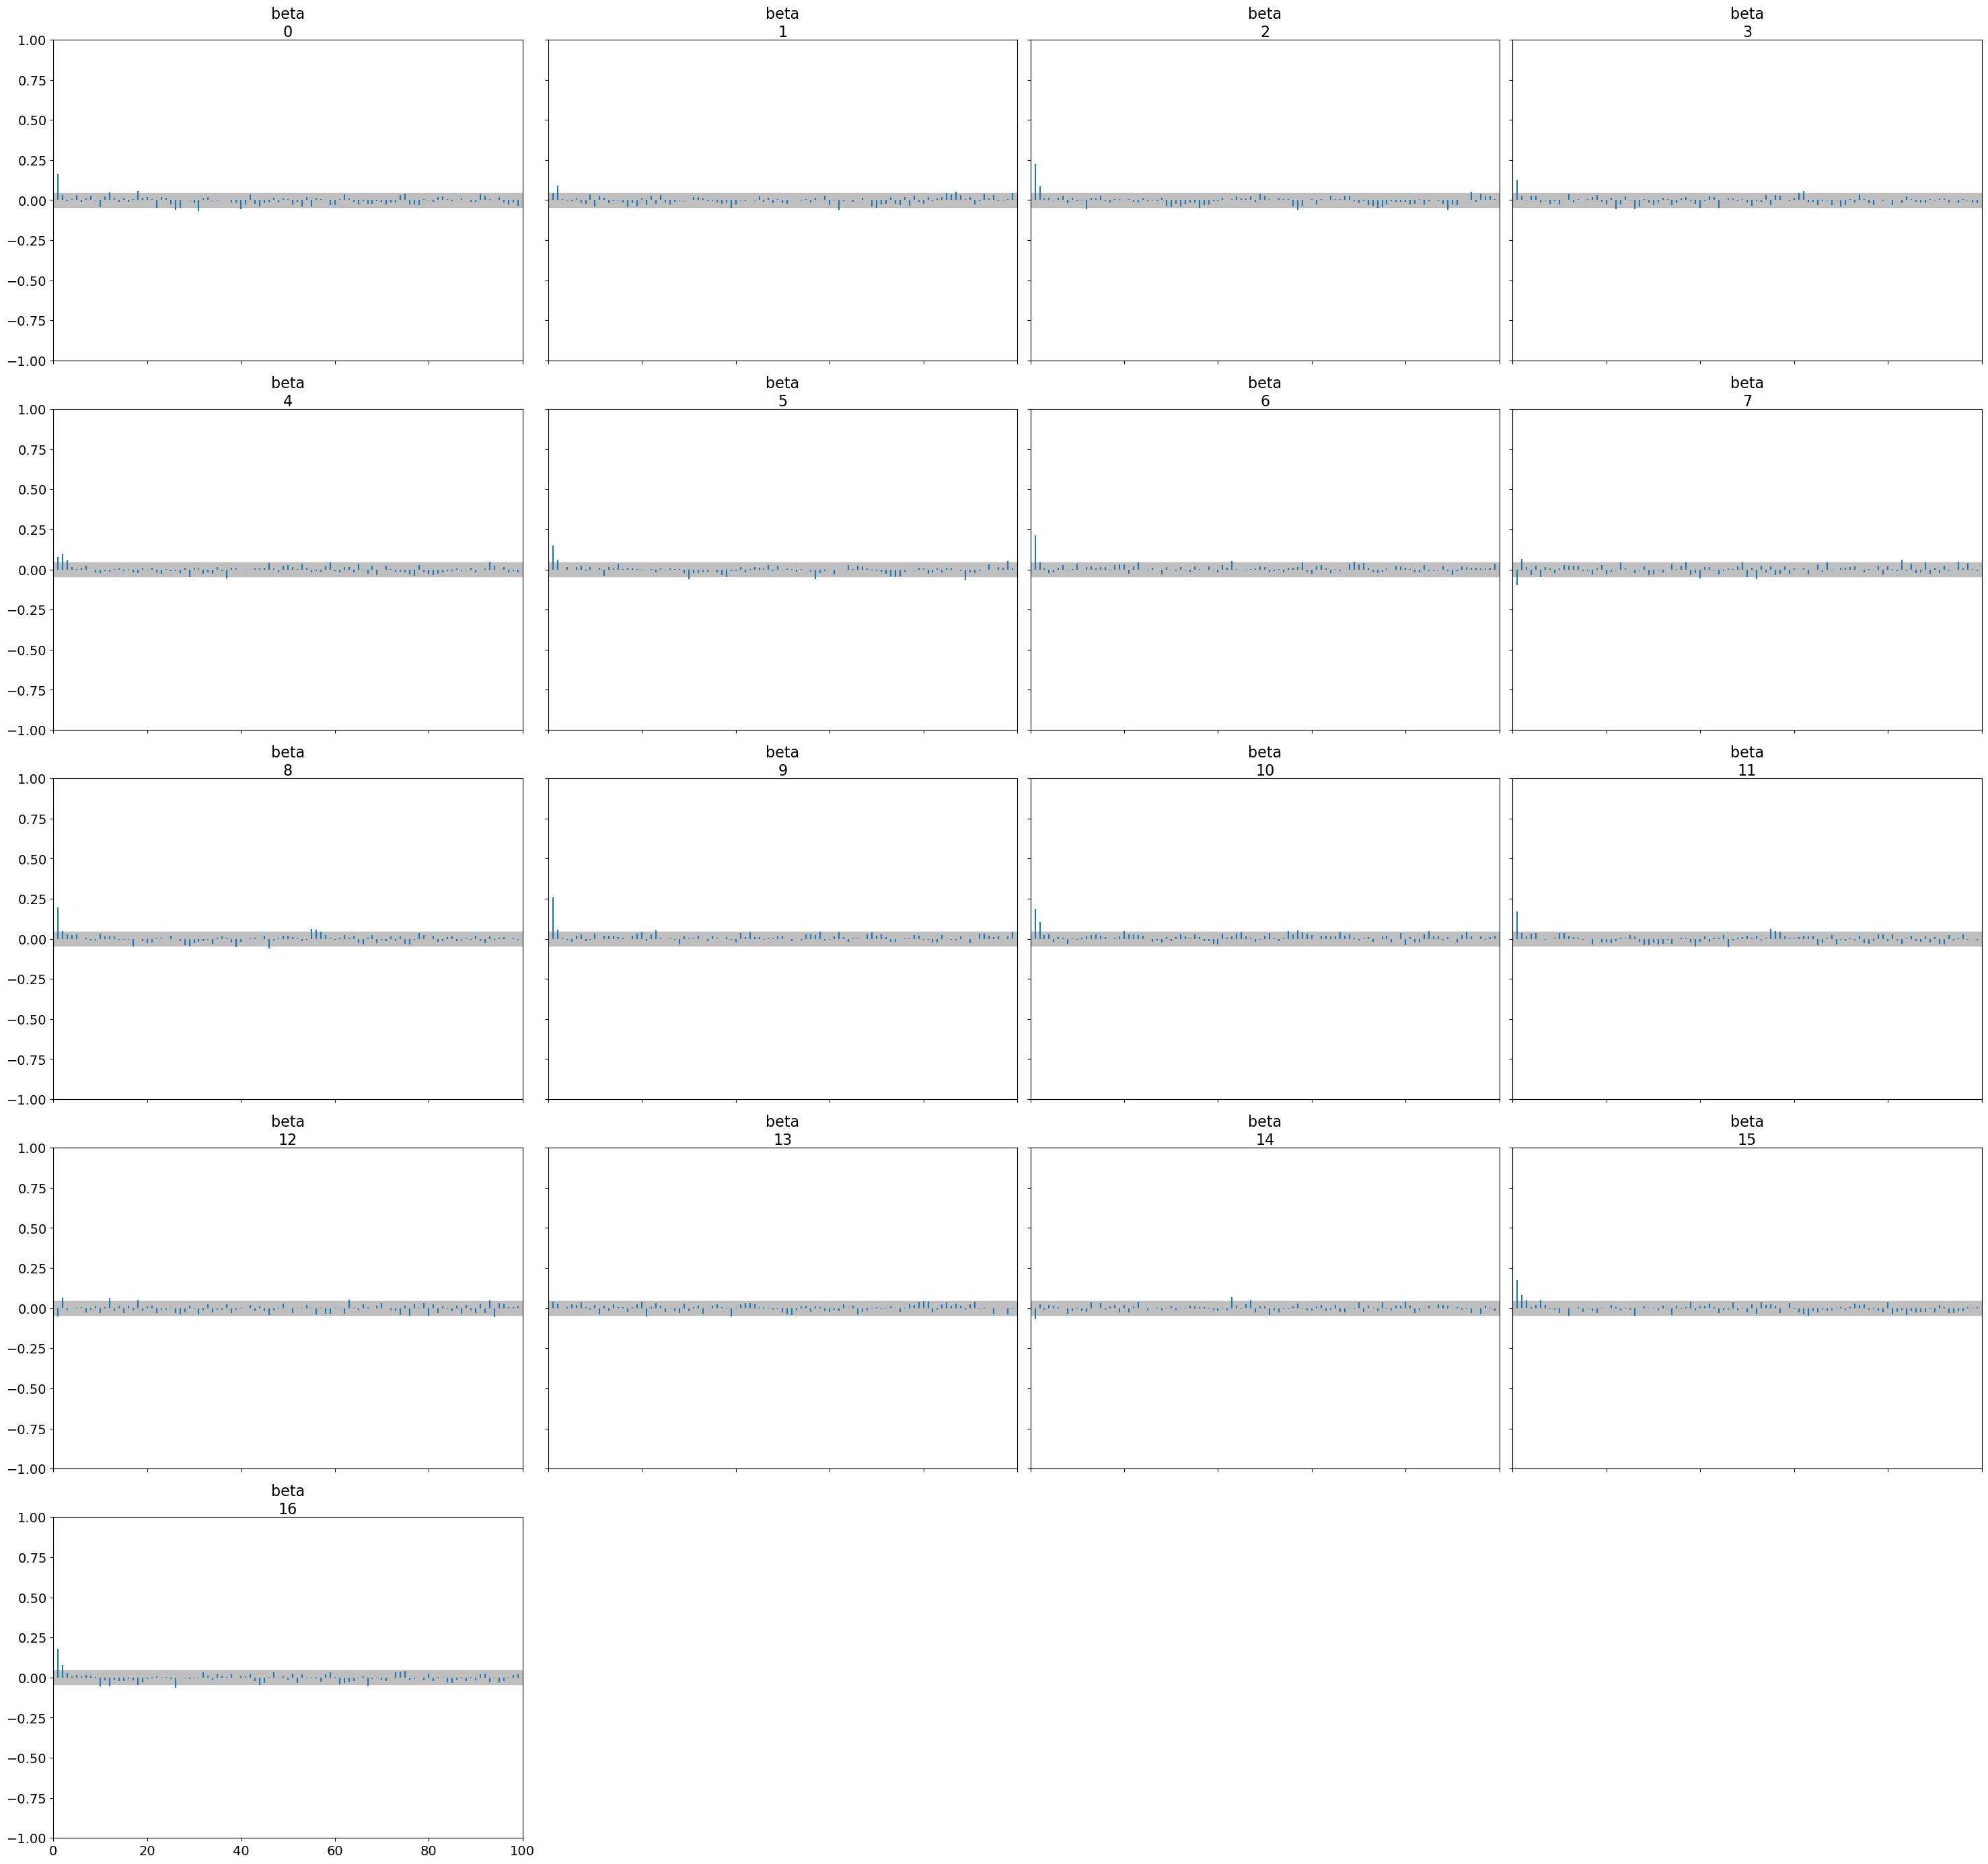

In [10]:
az.plot_autocorr(task_sac_aff_trace, combined= True);

#### Predictions

In [14]:
task_sac_aff_labels_test_class = modeler.make_labels_binary(task_sac_aff_labels_test, task_oriented_affective_empathy_median)
task_sac_aff_predictions = modeler.generate_model_predictions(task_sac_aff_empathy, task_sac_aff_features_test, task_sac_aff_trace)
task_sac_aff_predictions_class = modeler.make_labels_binary(task_sac_aff_predictions, 0.5)
accuracy_score(task_sac_aff_labels_test_class, task_sac_aff_predictions_class)

0.8331519521153584

#### __Combined predictions__

In [21]:
task_fix_stimuli, task_sac_stimuli = loader.get_stimuli("test", "task")
predicted_aff_empathy = modeler.combine_predictions(task_fix_aff_predictions, task_fix_stimuli, task_sac_aff_predictions, task_sac_stimuli)
real_empathy_aff_values = [1 if task_oriented_affective_empathy[k[1]] >= task_oriented_affective_empathy_median else 0 for k in predicted_aff_empathy.keys()]
predicted_empathy_aff_values = [1 if level >= 0.5 else 0 for level in list(predicted_aff_empathy.values())]
accuracy_score(predicted_empathy_aff_values, real_empathy_aff_values)

0.550561797752809